## Optimizing Marketing Expenses for Yandex Afisha

<span style="color:blue">**Project description:**</span> In this project, we work as an intern in the analytical department at Yandex.Afisha. Our task is to help optimize marketing expenses.

### Table of Contents

* [Step 1](#step1) Data preprocessing
* [Step 2](#step2) Metric computations and reports
    * [Product analysis](#step2_1)
    * [Sales analysis](#step2_2)
    * [Marketing analysis](#step2_3)
* [Step 3](#step3) Conclusions and recommendations to the marketing department

<span style="color:blue">**Importing libraries:**</span> First, we import all code libraries and define helper functions we will be using in our project.

In [1]:
import matplotlib.ticker as ticker
# Import libraries 

# Import the pandas library 
#      (url-> https://pandas.pydata.org/).
import pandas as pd

# Import the numpy library 
#      (url-> https://pandas.pydata.org/).
import numpy as np

# Import stats module from scipy  
#      (url-> https://www.scipy.org/).
from scipy import stats as st

# Import pyplot module from matplotlib 
#      (url-> https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html).
import matplotlib.pyplot as plt

# Import the seaborn library 
#      (url-> https://seaborn.pydata.org/).
import seaborn as sns

# Import Markdown and display modules from IPython.display library 
#      (url -> https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html).
from IPython.display import Markdown, display

# Import the warnings and ignore them
#      (url-> https://docs.python.org/3/library/warnings.html).
import warnings
warnings.filterwarnings('ignore')

import datetime as dt

import matplotlib.ticker as ticker


In [2]:
# Define helper functions.

# Define printmd() function to print code in blue color.
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))
    

<a class="anchor" id="step1"></a> 
### Step 1. Download the data and prepare it for analysis

We have been provided with the following datasets:
- `/datasets/visits_log_us.csv`: Server logs with data on Yandex.Afisha visits from June 2017 through May 2018; 
- `/datasets/orders_log_us.csv`: Dump file with all orders for the period;
- `/datasets/costs_us.csv`: Marketing expenses statistics.

We are going to study the following points:
- How people use the product;
- When they start to buy;
- How much money each customer brings;
- When they pay off.

In [3]:
# Read comma-separated values (csv) file into a pandas DataFrame object using pandas.read_csv() method.
# Use try...except to make sure the project runs both on local machine and platform.
try:    # paths on local machine.
    visits = pd.read_csv('visits_log_us.csv', nrows=10) 
    orders = pd.read_csv('orders_log_us.csv', nrows=10) 
    costs = pd.read_csv('costs_us.csv', nrows=10) 
except:    # paths on Practicum100 platform.
    visits = pd.read_csv('/datasets/visits_log_us.csv', nrows=10) 
    orders = pd.read_csv('/datasets/orders_log_us.csv', nrows=10) 
    costs = pd.read_csv('/datasets/costs_us.csv', nrows=10) 
 

# Create a tuple from the dataframes.
data = (visits, orders, costs) 
# Assign names to the dataframes
visits.name = 'visits_log_us'
orders.name = 'orders_log_us'
costs.name = 'costs_us'

# Print a concise summary of the dataFrames with pandas.DataFrame.info() method.
for df in data:
    printmd("{}".format(df.name), color='blue')
    df.info()
    print()


<span style='color:blue'>visits_log_us</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
Device       10 non-null object
End Ts       10 non-null object
Source Id    10 non-null int64
Start Ts     10 non-null object
Uid          10 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 528.0+ bytes



<span style='color:blue'>orders_log_us</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Buy Ts     10 non-null object
Revenue    10 non-null float64
Uid        10 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 368.0+ bytes



<span style='color:blue'>costs_us</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
source_id    10 non-null int64
dt           10 non-null object
costs        10 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 368.0+ bytes



We do not have any null entries in the dataframes. However, we can see that many columns are stored as string objects, which may not be optimal. To check, let us print the first and last few rows of the dataframes.

In [4]:
# Display first and last five rows of the dataFrames. 
for df in data:
    printmd("{}".format(df.name), color='blue')
    display(df.head())
    display(df.tail())
    print()
    

<span style='color:blue'>visits_log_us</span>

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


,Device,End Ts,Source Id,Start Ts,Uid
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


<span style='color:blue'>orders_log_us</span>

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


,Buy Ts,Revenue,Uid
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


<span style='color:blue'>costs_us</span>

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


,source_id,dt,costs
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


From the printed information and rows, we see that the date/time data is not optimally stored. The following date/time columns that are stored as string objects use a lot of memory space:
- <font color='blue'>visits_log_us:</font> `End Ts` and `Start Ts` columns;
- <font color='blue'>orders_log_us:</font> `Buy Ts` column;
- <font color='blue'>costs_us:</font> `dt` column.

We can optimize memory usage by storing them as Datetime objects. Also, date/time arithmetic can be then performed conveniently using the built-in library functions. 

Beside date/time data, we also have the following column containing string objects:
- <font color='blue'>visits_log_us:</font> `Device` column.
We expect this column to consist from few categories specifying the type of devices with which the users accessed the service. Let us check the unique values populating this column. 

In [5]:
display(visits['Device'].unique())


array(['touch', 'desktop'], dtype=object)

Indeed, we only have two categories. In this case, memory usage can be optimized by storing the data in the column as a category. 

Beside the problems with the data types, we also observe that the column names are not consistent, some start with capital letters, some not, some have space between words, while some use underscore to join words. 

We will first optimize the data types and then rename the columns. We can optimize the data types in two ways: we can either cast the columns to the appropriate types, or we can read and store them with the correct data types from the begining. We go by the second option.

In [6]:
# Read and store the data with the correct data types;

# Read comma-separated values (csv) file into a pandas DataFrame object using pandas.read_csv() method.
# Use try...except to make sure the project runs both on local machine and platform.
try:    # paths on local machine.
    visits = pd.read_csv('visits_log_us.csv',
                        dtype={'Device': 'category'},
                        parse_dates=['Start Ts', 'End Ts']) 
    orders = pd.read_csv('orders_log_us.csv',
                        parse_dates=['Buy Ts']) 
    costs = pd.read_csv('costs_us.csv',
                        parse_dates=['dt']) 
except:    # paths on Practicum100 platform.
    visits = pd.read_csv('/datasets/visits_log_us.csv',
                        dtype={'Device': 'category'},
                        parse_dates=['Start Ts', 'End Ts'])  
    orders = pd.read_csv('/datasets/orders_log_us.csv',
                        parse_dates=['Buy Ts']) 
    costs = pd.read_csv('/datasets/costs_us.csv',
                        parse_dates=['dt'])   

# Create a tuple from the dataframes.
data = (visits, orders, costs)

# Assign names to the dataframes
visits.name = 'visits_log_us'
orders.name = 'orders_log_us'
costs.name = 'costs_us'


Now that we have optimized the data types, let us rename the columns appropriately. 

In [7]:
for df in data:
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace('\s+', '_')


Finally, let us print the information on preprocessed dataframes one more time to see how the memory usage is affected.

In [8]:
# Print a concise summary of the dataFrames with pandas.DataFrame.info() method.
for df in data:
    printmd("{}".format(df.name), color='blue')
    df.info()
    print()
    

<span style='color:blue'>visits_log_us</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null category
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB



<span style='color:blue'>orders_log_us</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB



<span style='color:blue'>costs_us</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB



Let us also look at the columns descriptions

In [9]:
for df in data:
    printmd(df.name, color='blue')
    for col in df:
        display(df[col].describe().to_frame())
        print()

<span style='color:blue'>visits_log_us</span>

,device
count,359400
unique,2
top,desktop
freq,262567


,end_ts
count,359400
unique,224760
top,2017-11-24 16:51:00
freq,23
first,2017-06-01 00:02:00
last,2018-06-01 01:26:00


,source_id
count,359400.000000
mean,3.750515
std,1.917116
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,10.000000


,start_ts
count,359400
unique,224303
top,2017-11-24 16:06:00
freq,19
first,2017-06-01 00:01:00
last,2018-05-31 23:59:00


,uid
count,3.594000e+05
mean,9.202557e+18
std,5.298433e+18
min,1.186350e+13
25%,4.613407e+18
50%,9.227413e+18
75%,1.372824e+19
max,1.844668e+19


<span style='color:blue'>orders_log_us</span>

,buy_ts
count,50415
unique,45991
top,2018-05-31 10:13:00
freq,9
first,2017-06-01 00:10:00
last,2018-06-01 00:02:00


,revenue
count,50415.000000
mean,4.999647
std,21.818359
min,0.000000
25%,1.220000
50%,2.500000
75%,4.890000
max,2633.280000


,uid
count,5.041500e+04
mean,9.098161e+18
std,5.285742e+18
min,3.135781e+14
25%,4.533567e+18
50%,9.102274e+18
75%,1.368290e+19
max,1.844617e+19


<span style='color:blue'>costs_us</span>

,source_id
count,2542.000000
mean,4.857199
std,3.181581
min,1.000000
25%,2.000000
50%,4.000000
75%,9.000000
max,10.000000


,dt
count,2542
unique,364
top,2018-03-03 00:00:00
freq,7
first,2017-06-01 00:00:00
last,2018-05-31 00:00:00


,costs
count,2542.000000
mean,129.477427
std,156.296628
min,0.540000
25%,21.945000
50%,77.295000
75%,170.065000
max,1788.280000


Let us check if the visit sessions start and end time are consistent

In [10]:
if (visits['end_ts'] >= visits['start_ts']).sum():
    print('Good news: No sessions ended before starting.')
else:
    print('Inconsistency found: Some sessions ended before starting!')


Good news: No sessions ended before starting.


Let us check for duplicates in the datasets.

In [11]:
# Identify duplicated entries in DataFrame using pandas.DataFrame.duplicated() method.

for df in data:
    printmd("{}".format(df.name), color='blue')
    print('The number of duplicates in raw data is: ', df.loc[df.duplicated() == True].shape[0])
    print()


<span style='color:blue'>visits_log_us</span>

The number of duplicates in raw data is:  0



<span style='color:blue'>orders_log_us</span>

The number of duplicates in raw data is:  0



<span style='color:blue'>costs_us</span>

The number of duplicates in raw data is:  0



We found no duplicated entries in the dataset. Let's us check datetime consistency across the `visits` and `orders` datasets. 

In [12]:
orders_first = orders.groupby('uid')['buy_ts'].min()
visits_first = visits.groupby('uid')['start_ts'].min()
join_firsts = pd.concat([visits_first, orders_first], axis=1)

cond_1 = (join_firsts['start_ts'] < join_firsts['buy_ts'])
cond_2 = (join_firsts['buy_ts'].isnull())
cond_3 = (join_firsts['start_ts'] == join_firsts['buy_ts'])

if join_firsts.loc[~cond_1 & ~cond_2 & ~cond_3].shape[0] == 0:
    print('No datetime inconsistencies found across visits and orders')
else:
    print('Inconsistencies found across visits and orders')
    
# Check if for all users' who placed orders, we have also an entry in the visits dataset
cond_4 = (join_firsts['start_ts'].isnull())
if orders_first.shape[0] == join_firsts.loc[~cond_2 & ~cond_4].shape[0]:
    print('For each of the {} unique users who placed an order'.format(orders_first.shape[0]), 
          'there is a visits entry.')
else:
    print('From the {} unique users who placed an order'.format(orders_first.shape[0]),
          'only {} of them have visits entries'.format(join_firsts.loc[~cond_2].shape[0]))


No datetime inconsistencies found across visits and orders
For each of the 36523 unique users who placed an order there is a visits entry.


We checked inconsistencies in the `start_ts` and `buy_ts` columns of the `visits` and `orders` datasets. We found out that the first order (if any) is always placed after or at the same time as the first visit time of users. We also found out that for each user who placed at least one order, there is a first visit record. 

**Concluding remarks** In this step, we stored the data on visits, orders, and expenses in variables. We optimized the data for analysis by making sure each column contains the correct data type. We also renamed the columns according to established naming conventions. Finally we made sure there are no duplicates in the datasets and that the stored datetimes are consistent across the datasets. Now we are ready to make reports and calculate metrics.

<a class="anchor" id="step2"></a> 
### Step 2. Make reports and calculate metrics:

Here, we will carry out product, sales, and marketing analysis by answering the following sets of questions.
1. Product:
    - How many people use it every day, week, and month?
    - How many sessions are there per day? 
    - What is the length of each session?
    - How often do users come back?
2. Sales:
    - When do people start buying?
    - How many orders do they make during a given period of time? 
    - What is the average purchase size?
    - How much money do they bring? (LTV)
3. Marketing:
    - How much money was spent? Overall/per source/over time
    - How much did customer acquisition from each of the sources cost?
    - How worthwhile where the investments? (ROI)
    
We will also plot graphs to display how these metrics differ for various devices and ad sources and how they change in time.

Quoting from the website https://www.ewdn.com/2014/09/08/yandex-afisha-transforms-russians-movie-theater-experience/, we gathered the following information on Yandex.Afisha:

"Russian search engine Yandex recently teamed up with Afisha, the top Russian site geared towards films and television programs, to present Russians with the option to search showtimes and pre-purchase tickets online.

As blogged by Yandex (in Russian), users purchase tickets to the cinema for no additional charge by simply editing parameters for the city, theatre, and selected film.  Users can then pay for the ticket on their credit card or in-person at the ticket office by presenting an order number that they are sent via text. Currently the service works in 93 Russian cities. Russians can order their movie tickets at home or on Android and iOS supported phones.""

So, the market Russian search and digital advertising market..

<a class="anchor" id="step2_1"></a> 
#### Step 2.1. Product analysis

- *How many people use the product every day, week, and month?*

We first want to get an idea about how many people are interested in using our product. To do so, we will count the number of people who used the product during different timeframes. Let us remind ourselves the overall period for which we have visitor logs.

In [13]:
display(visits['start_ts'].describe())


count                  359400
unique                 224303
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: start_ts, dtype: object

The logs of visits span the period from 1 June 2017 to 31 May 2018. Let us now count the number of users for each day, each week, and each month. As the first step we extract the date, week, and month information and store them in separate columns. 

In [14]:
visits['date'] = visits['start_ts'].astype('datetime64[D]')
visits['week'] = visits['start_ts'].astype('datetime64[W]')
visits['month'] = visits['start_ts'].astype('datetime64[M]')
visits['year'] = visits['start_ts'].astype('datetime64[Y]')
visits.info()
visits.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 9 columns):
device       359400 non-null category
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
date         359400 non-null datetime64[ns]
week         359400 non-null datetime64[ns]
month        359400 non-null datetime64[ns]
year         359400 non-null datetime64[ns]
dtypes: category(1), datetime64[ns](6), int64(1), uint64(1)
memory usage: 22.3 MB


,device,end_ts,source_id,start_ts,uid,date,week,month,year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,2017-01-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,2018-01-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017-01-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,2018-01-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,2017-01-01


Now, we group the visits according to the appropriate periods to count the number of visits. We start by computing and ploting the number of daily active users (DAU).

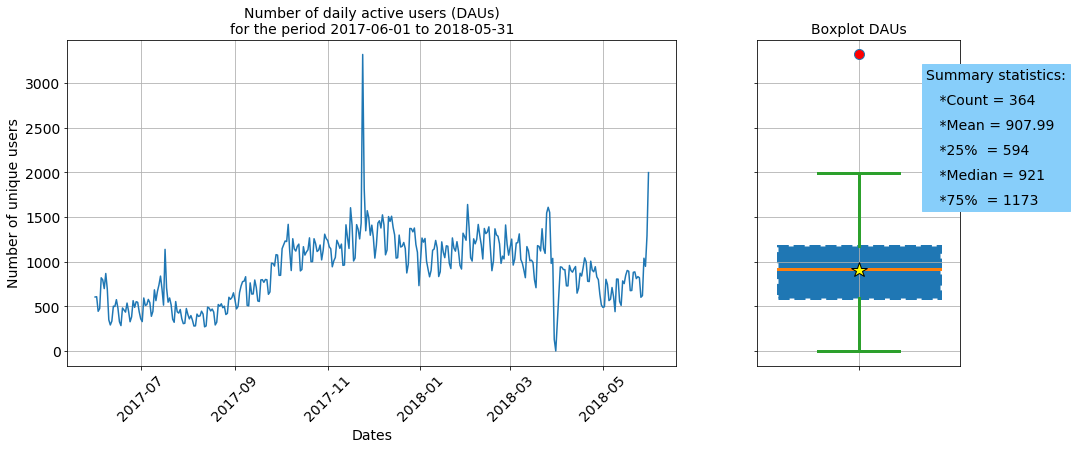

In [15]:
dau = visits.groupby('date').agg({'uid': 'nunique'}).reset_index()
dau = dau.rename({'uid':'dau'}, axis = 1)

fig, ax = plt.subplots(1, 2, figsize=(16,6), sharey=True, gridspec_kw={'width_ratios': [3, 1]})

ax[0].plot(dau['date'], dau['dau'])
ax[0].set_title('Number of daily active users (DAUs)\n'
          'for the period 2017-06-01 to 2018-05-31', fontsize=14)
ax[0].set_xlabel('Dates', fontsize=14)

ax[0].set_ylabel('Number of unique users', fontsize=14)
ax[0].tick_params(axis='both', labelsize=14)
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid()

ax[1] = sns.boxplot(x=dau['dau'], orient='v', 
                    boxprops = dict(linestyle='--', linewidth=3, color='C0'),
                    whiskerprops = dict(color='C2', linewidth=3),
                    capprops = dict(color='C2', linewidth=3),
                    flierprops = dict(marker='o', markerfacecolor='r', markersize=10,
                                      linestyle='none', markeredgecolor='C0'),
                    medianprops = dict(color='C1', linewidth=3),
                    meanprops = dict(marker='*', markerfacecolor='yellow', markersize=16,
                                      linestyle='none', markeredgecolor='black'),
                    showmeans = True)
ax[1].set_title('Boxplot DAUs', fontsize=14)
ax[1].set_ylabel('', fontsize=14)
ax[1].tick_params(axis='y', labelsize=14)
ax[1].grid()

stats_dau = dau['dau'].describe()
plt.figtext(0.87, 0.5, 
   "Summary statistics:\n   *Count = {}\n   *Mean = {}\n   *25%  = {}\n"
   "   *Median = {}\n   *75%  = {}"
                     .format(int(stats_dau['count']), 
                             stats_dau['mean'].round(2), 
                             int(stats_dau['25%']), 
                             int(stats_dau['50%']), 
                             int(stats_dau['75%'])),
                      linespacing = 2, fontsize=14, backgroundcolor='lightskyblue')


plt.show()


In [16]:
print('Finding peaks and dips in DAU:')
print()
print('First peak:')
cond = dau['dau'] == dau['dau'].max()
print(dau.loc[cond])
print()

print('Second peak:')
dau_2 = dau.loc[~cond]
cond_2 = dau_2['dau'] == dau_2['dau'].max()
print(dau_2.loc[cond_2])
print()

print('Dip:')
cond_3 = dau['dau'] == dau['dau'].min()
print(dau.loc[cond_3])


Finding peaks and dips in DAU:

First peak:
          date   dau
176 2017-11-24  3319

Second peak:
          date   dau
363 2018-05-31  1997

Dip:
          date  dau
303 2018-03-31    1


The boxplot of the DAU tells us that there were on average slightly more than 900 visitors per day of our product. The median is very close to the mean value, so we do not expect very large or very small outliers. However, from the DAU plot, we can clearly group the DAU numbers into three seasons. The 'high' season lasted approximately from the begining of October 2017 to the end of March 2018. The visiotr numbers varied in the band of 1000- to 1500+ visits. In the 'low' season, spaning the period from June to the end of August 2017, the numbers fluctuated around 500 visits per day. As for the 'mid' season, including September 2017, April and May 2018, the DAUs stayed in the 500 to 1000 visitors band. There were few noticeable exceptions to the seasonal trends, whose dates we have identified. On the 24th of November, in high season, Yandex.Afisha had 3319 visitors. This is Black Friday, so we guess this is at the root of this peak. On the 31st of May, in mid season, it got 1997 visitors. Quoting from wikipedia, we found out the following information on this day called the Memorial Day:

"Memorial Day is a federal holiday in the United States for honoring and mourning the military personnel who have died in the performance of their military duties while serving in the United States Armed Forces". 

Apparently, there is a big sale on the Memorial day in the US.Now, from our understanding Yandex.Afisha operates in Russia, but the Practicum program first started in the US. So, it is possible that the dataset was adapted to the US market. Besides the two peaks, also a big dip is observed on the 31st of March, where there were only 1 recorded visitors. This could be due to an error in the Yandex.Afisha application, or perhaps the site was unavailable that day for maintenance or was hacked. Normally, this can be clarified by discussed with colleagues from Yandex.Afisha. However, we cannot do this here. So, let's move to the number of weekly active users (WAU).

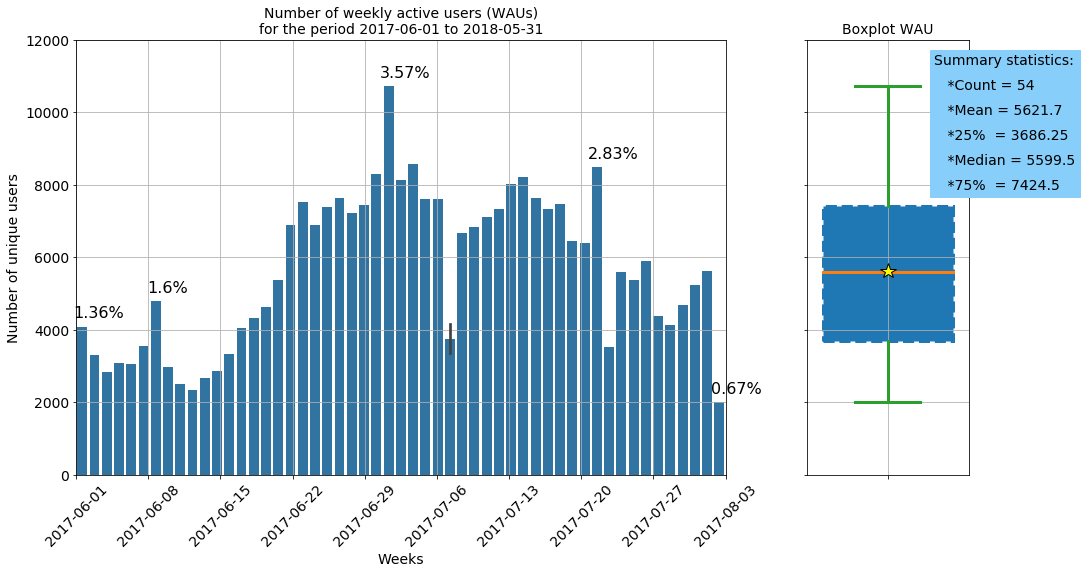

In [17]:
wau = visits.groupby(['year', 'week']).agg({'uid': 'nunique'}).reset_index()
wau = wau.rename({'uid':'wau'}, axis = 1)

fig, ax = plt.subplots(1, 2, figsize=(16,8), sharey=True, gridspec_kw={'width_ratios': [4, 1]})

sns.barplot(wau['week'].map(lambda x: dt.datetime.strftime(x, '%Y-%m-%d')), 
                    wau['wau'], color='C0', ax=ax[0])
ax[0].set_title('Number of weekly active users (WAUs)\n'
                'for the period 2017-06-01 to 2018-05-31',
          fontsize=14)
ax[0].set_xlabel('Weeks', fontsize=14)
ax[0].set_ylabel('Number of unique users', fontsize=14)
ax[0].tick_params(axis='both', labelsize=14)
ax[0].tick_params(axis='x', rotation=45)
ax[0].xaxis.set_major_locator(ticker.LinearLocator(10))
ax[0].set_ylim(top=12000)
ax[0].grid()

# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax[0].patches:
    totals.append(i.get_height())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
j=0
for i in ax[0].patches:
    if j in [0, 6, 25, 42, 52]:
    # get_x pulls left or right; get_height pushes up or down
        ax[0].text(i.get_x()-0.3, i.get_height()+250, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=16,
                color='black')
    j += 1
    


sns.boxplot(x=wau['wau'], orient='v', 
            boxprops = dict(linestyle='--', linewidth=3, color='C0'),
            whiskerprops = dict(color='C2', linewidth=3),
            capprops = dict(color='C2', linewidth=3),
            flierprops = dict(marker='o', markerfacecolor='r', markersize=10,
                              linestyle='none', markeredgecolor='C0'),
            medianprops = dict(color='C1', linewidth=3),
            meanprops = dict(marker='*', markerfacecolor='yellow', markersize=16,
                              linestyle='none', markeredgecolor='black'),
                    showmeans = True,
           ax=ax[1])
ax[1].set_title('Boxplot WAU', fontsize=14)
ax[1].set_ylabel('', fontsize=14)
ax[1].tick_params(axis='y', labelsize=14)
ax[1].grid()

stats_wau = wau['wau'].describe()
plt.figtext(0.87, 0.62, 
   "Summary statistics:\n   *Count = {}\n   *Mean = {}\n   *25%  = {}\n"
   "   *Median = {}\n   *75%  = {}"
                     .format(int(stats_wau['count']), 
                             stats_wau['mean'].round(2), 
                             stats_wau['25%'].round(2), 
                             stats_wau['50%'].round(2), 
                             stats_wau['75%'].round(2)),
                      linespacing = 2, fontsize=14, backgroundcolor='lightskyblue')


plt.show()


We have the WAU numbers for a period of 53 weeks. The median and mean are both close to 6000 visitors. However, the WAU numbers vary considerably. Indeed, the plot displays the seasonal variations we found in the previous DAU plot. From week 40 in 2017 (final week of September) to week 12 in 2018 (third week of March), the WAUs pass the threshold of 6000 visitors, and fluctuates approximately within the band of 6000 to 8000 visitors. The remaining weeks, the WAU numbers remained below 6000 visitors, and actually in the low season starting from week 22 in 2017 (end of May) till week 36 in 2017 (first week of September), the numbers fluctuated in the band of 2000 to 4000+ visits. On the other hand, in the weeks of September 2017, i.e., weeks 36 to 39, and from week 13 in 2018 (final week of March) to the end of May in 2018, they fluctuated in the band of 4000 to 6000 visits. Week 47 of 2018, which includes Black Friday, stands out in the plot as it got more than 10000 visitors. However, we can no longer observe from the WAU plot, the dip on the 31st of March 2018 (week 13) and the peak on the 31st of May 2018 (week 22). 

Note that having both the DAU and WAU is important, since we are always counting the number of active unique users within a specified period of time. So, if by looking at the DAU plot, we learn that around 500 people visited each day of a week, we can only tell that our products could have gotten somewhere between 500 to 3500 unique visitors during the week. It is possible that it was always the same 500 people visiting or always different ones. But, the range we get is pretty large and as a result we cannot obtain an accurate estimate for the total number of unique visitors for the week. We can learn about this by looking at the WAU plot. If the plot also shows around 500 visits, it would mean that the same users kept returning. But, if we observe 4000 visits in the WAU plot for that week, that would mean that we have acutally reached 4000 different people during that week, making our application much more popular. For the case of Yandex.Afisha, we can see that indeed the DAUs are not always the same users, and we are having every week visitors from a larger pool of people. Let's us see what happens when we count the monthly active (unique) users (MAU).  

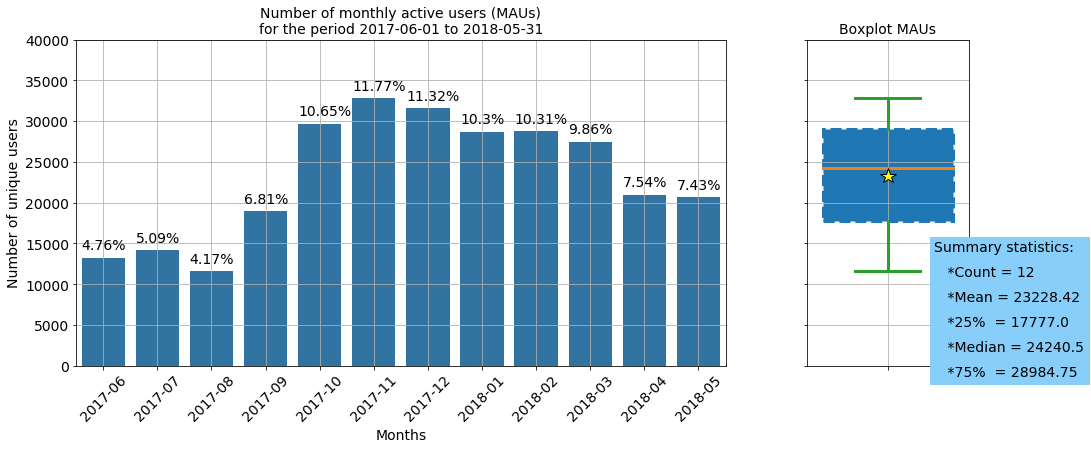

In [18]:
mau = visits.groupby(['year', 'month']).agg({'uid': 'nunique'}).reset_index()
mau = mau.rename({'uid':'mau'}, axis = 1)

fig, ax = plt.subplots(1, 2, figsize=(16,6), sharey=True, gridspec_kw={'width_ratios': [4, 1]})

sns.barplot(mau['month'].map(lambda x: dt.datetime.strftime(x, '%Y-%m')), 
                    mau['mau'], color='C0', ax=ax[0])
ax[0].set_title('Number of monthly active users (MAUs)\n'
                'for the period 2017-06-01 to 2018-05-31',
          fontsize=14)
ax[0].set_xlabel('Months', fontsize=14)
ax[0].set_ylabel('Number of unique users', fontsize=14)
ax[0].tick_params(axis='both', labelsize=14)
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_ylim(top=40000)
ax[0].grid()

# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax[0].patches:
    totals.append(i.get_height())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax[0].patches:
    # get_x pulls left or right; get_height pushes up or down
    ax[0].text(i.get_x(), i.get_height()+1000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='black')


sns.boxplot(x=mau['mau'], orient='v', 
            boxprops = dict(linestyle='--', linewidth=3, color='C0'),
            whiskerprops = dict(color='C2', linewidth=3),
            capprops = dict(color='C2', linewidth=3),
            flierprops = dict(marker='o', markerfacecolor='r', markersize=10,
                              linestyle='none', markeredgecolor='C0'),
            medianprops = dict(color='C1', linewidth=3),
            meanprops = dict(marker='*', markerfacecolor='yellow', markersize=16,
                              linestyle='none', markeredgecolor='black'),
                    showmeans = True,
           ax=ax[1])
ax[1].set_title('Boxplot MAUs', fontsize=14)
ax[1].set_ylabel('', fontsize=14)
ax[1].tick_params(axis='y', labelsize=14)
ax[1].grid()

stats_mau = mau['mau'].describe()
plt.figtext(0.87, 0.1, 
   "Summary statistics:\n   *Count = {}\n   *Mean = {}\n   *25%  = {}\n"
   "   *Median = {}\n   *75%  = {}"
                     .format(int(stats_mau['count']), 
                             stats_mau['mean'].round(2), 
                             stats_mau['25%'].round(2), 
                             stats_mau['50%'].round(2), 
                             stats_mau['75%'].round(2)),
                      linespacing = 2, fontsize=14, backgroundcolor='lightskyblue')


plt.show()


We computed the MAUs for the 12 months period. On average, our product received slightly more than 23000 visits per months. Here the median is slightly larger, reaching slightly more than 24000 visits. Even though the mean and median values are relatively close, the seasonal variations are still noticeable in the plot. It turned out that in the high season from October 2017 till end of March 2018, Yandex.Afisha got each month more than 25000 active visitors, and even more than 30000 visitors in November and December 2017. In the low season, it got between 10000 to 15000 visitors in summer from June to August 2017. In the mid season, it got close to 20000 visitors at the start of Autumn in September 2017, and slightly more than 20000 visitors in spring time April and May 2018. 

Since we observed consistently the seasonal variations over the different activity periods, it does make sense for us to compute seasonal averages for the DAUs, WAUs, and MAUs. Let us report the overall and seasonal averages in one table.

In [19]:
def find_season(int_month):
    season = 'none'
    if int_month in([6, 7, 8]):
        season = 'low'
    if int_month in([4, 5, 9]):
        season = 'mid'
    if int_month in([10, 11, 12, 1, 2, 3]):
        season = 'high'
    return season

visits['season'] = visits['month'].dt.month

visits['season'] = visits['season'].transform(find_season)
display(visits.head())


dau_avg = dau['dau'].mean()
wau_avg = wau['wau'].mean()
mau_avg = mau['mau'].mean()

dau_avg_s = (visits.groupby(['season', 'date']).agg({'uid': 'nunique'})
                    .groupby('season').mean()).astype('int')

wau_avg_s = (visits.groupby(['season', 'year', 'week']).agg({'uid': 'nunique'})
                    .groupby('season').mean()).astype('int')


mau_avg_s = (visits.groupby(['season', 'year', 'month']).agg({'uid': 'nunique'})
                    .groupby('season').mean()).astype('int')


activity_dict = {'dau': [dau_avg_s.loc['low', 'uid'], dau_avg_s.loc['mid', 'uid'],
                         dau_avg_s.loc['high', 'uid'], int(dau_avg)], 
                 'wau': [wau_avg_s.loc['low', 'uid'], wau_avg_s.loc['mid', 'uid'],
                         wau_avg_s.loc['high', 'uid'], int(wau_avg)], 
                 'mau': [mau_avg_s.loc['low', 'uid'], mau_avg_s.loc['mid', 'uid'],
                         mau_avg_s.loc['high', 'uid'], int(mau_avg)] }
user_activity = pd.DataFrame(data=activity_dict, 
                  index=['Low Season Average', 'Mid Season Average', 
                         'High Season Average', 'Overall Average'])

display(user_activity)



,device,end_ts,source_id,start_ts,uid,date,week,month,year,season
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,2017-01-01,high
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,2018-01-01,high
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017-01-01,low
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,2018-01-01,mid
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,2017-01-01,high


,dau,wau,mau
Low Season Average,491,3003,13024
Mid Season Average,789,4399,20228
High Season Average,1176,6995,29830
Overall Average,907,5621,23228


It is also useful to compute the sticky factors DAU/MAU and WAU/MAU. The sticky factors tell us how loyal the visitors are, i.e., how often they return to the product. A precise (daily or weekly) computation could be carried out by merging the metric dataframes on the appropriate dates. Since we already reduced the variations by grouping the visit dates into seasons, we will content with the sticky factors using the above seasonal averages. 

In [20]:
sticky_dict = {'dau/wau_%': [dau_avg_s.loc['low', 'uid']/wau_avg_s.loc['low', 'uid'],
                         dau_avg_s.loc['mid', 'uid']/wau_avg_s.loc['mid', 'uid'],
                          dau_avg_s.loc['high', 'uid']/wau_avg_s.loc['high', 'uid']],
                 'dau/mau_%':  [dau_avg_s.loc['low', 'uid']/mau_avg_s.loc['low', 'uid'],
                         dau_avg_s.loc['mid', 'uid']/mau_avg_s.loc['mid', 'uid'],
                          dau_avg_s.loc['high', 'uid']/mau_avg_s.loc['high', 'uid']]}
sticky_factor = pd.DataFrame(data=sticky_dict, 
                  index=['Low Season', 'Mid Season', 
                         'High Season'])
sticky_factor = (sticky_factor*100).round(1)

display(sticky_factor)


,dau/wau_%,dau/mau_%
Low Season,16.4,3.8
Mid Season,17.9,3.9
High Season,16.8,3.9


Interestingly the sticky factors do not vary much across the seasons. Thus, the loyalty pattern of the users remain the same throughout the year. 

Finally, let us count the overall number of active unique users over one year period and the seasons.  

In [21]:
print('From 2017-06-01 to 2018-05-31 Yandex.Afisha got {} unique visitors'
      .format(visits['uid'].nunique()))
display(visits.groupby(['season']).agg({'uid': 'nunique'})
        .rename(columns={'uid':'number of unique visitors'}))


From 2017-06-01 to 2018-05-31 Yandex.Afisha got 228169 unique visitors


,number of unique visitors
season,
high,154320
low,36580
mid,57653


We found out that there were ca. 22800 people who visited our product in a one year period. The following user behavior pattern emerges from our findings for the different activity periods: Out of the ca. 228000 unique users who visited our product in the period of one year, 
ca. 154000 came in the high season, ca. 57500 in the mid season, and ca. 36500 in the low season. During all seasons, around 16% of the users returned during the week and close to 4% returned to the product during the month.  

- *How many sessions are there per day?*

Next, we want to know the number of sessions per day. So, let us count them. We will also find the counts by devices.

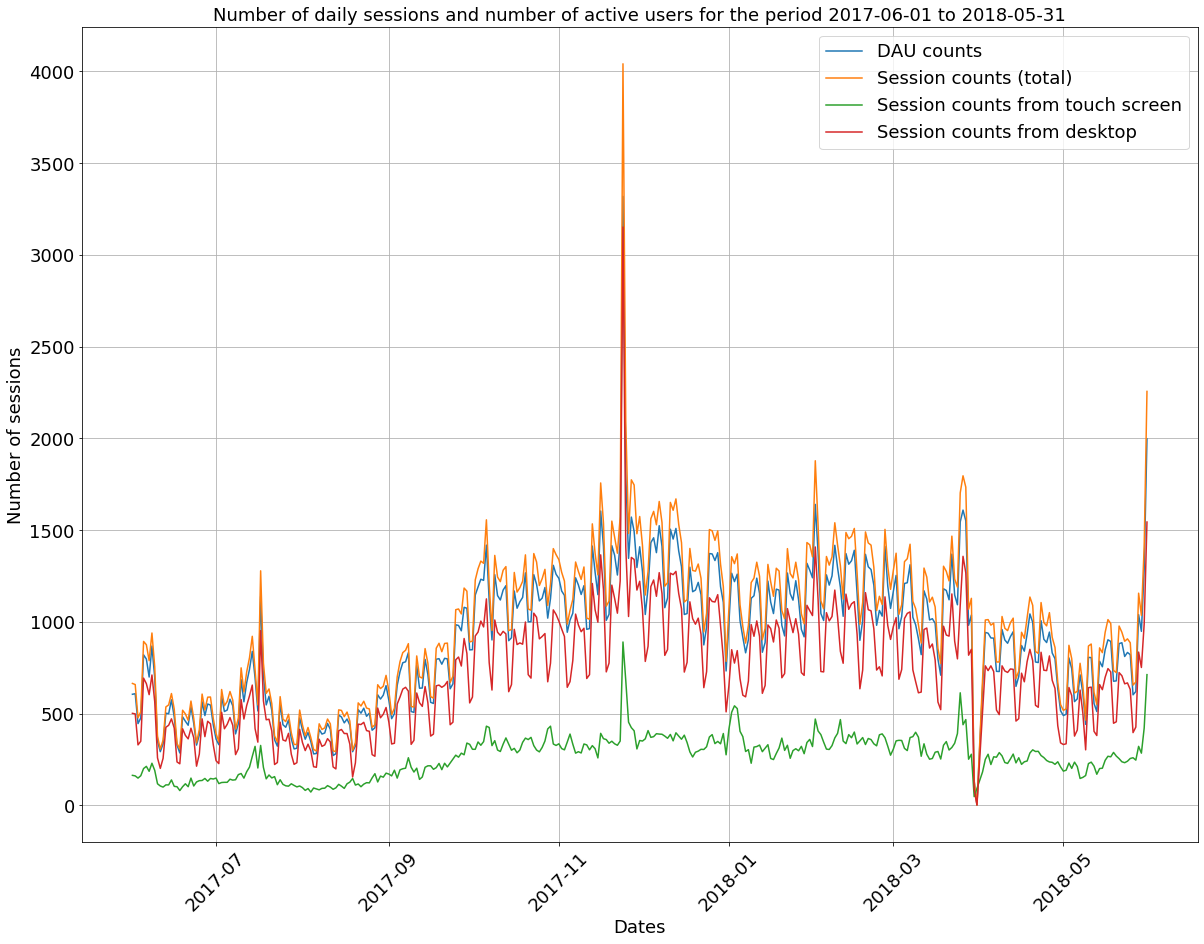

In [22]:
daily_sessions = visits.groupby('date').agg({'uid':'count'}).reset_index()

visits_touch = visits.loc[visits['device'] == 'touch']
visits_desktop = visits.loc[visits['device'] == 'desktop']

daily_sessions_touch = visits_touch.groupby('date').agg({'uid':'count'}).reset_index()
daily_sessions_desktop = visits_desktop.groupby('date').agg({'uid':'count'}).reset_index()

plt.figure(figsize=(20,15))
plt.plot(dau['date'], dau['dau'], label='DAU counts')
plt.plot(daily_sessions['date'], daily_sessions['uid'], label='Session counts (total)')
plt.plot(daily_sessions_touch['date'], daily_sessions_touch['uid'], 
         label='Session counts from touch screen')
plt.plot(daily_sessions_desktop['date'], daily_sessions_desktop['uid'], 
         label='Session counts from desktop')

plt.title('Number of daily sessions and number of active users '
          'for the period 2017-06-01 to 2018-05-31', fontsize=18)
plt.xlabel('Dates', fontsize=18)
plt.ylabel('Number of sessions', fontsize=18)
plt.legend(fontsize=18)
plt.xticks(fontsize=18, rotation=45)
plt.yticks(fontsize=18)
plt.grid()
plt.show()


The plot shows that our product is accessed more from desktop devices compared to touch screen devices. In addition, the number of sessions per day is not much different than the number of DAUs. Therefore we expect the majority of the DAUs to use our product only once in the day they are active. As a result, we also observe in the above plot the seasonal trend in the number of daily sessions (in the total and desktop counts). Let us report the average session durations for the seasons and the overall period in one table. 

In [23]:
session_avg = (visits.groupby(['season','date']).agg({'uid':'count'})
               .groupby('season').agg({'uid':'mean'}).astype('int'))

touch_session_avg = (visits_touch.groupby(['season','date']).agg({'uid':'count'})
               .groupby('season').agg({'uid':'mean'}).astype('int'))

desktop_session_avg = (visits_desktop.groupby(['season','date']).agg({'uid':'count'})
               .groupby('season').agg({'uid':'mean'}).astype('int'))


session_dict = {'dau': [dau_avg_s.loc['low', 'uid'], dau_avg_s.loc['mid', 'uid'],
                         dau_avg_s.loc['high', 'uid'], int(dau_avg)], 
                'session_counts': [session_avg.loc['low', 'uid'], 
                                    session_avg.loc['mid', 'uid'],
                                    session_avg.loc['high', 'uid'], 
                                   int(daily_sessions['uid'].mean())], 
                'desktop_session_counts': [desktop_session_avg.loc['low', 'uid'], 
                                            desktop_session_avg.loc['mid', 'uid'],
                                            desktop_session_avg.loc['high', 'uid'],
                                          int(daily_sessions_desktop['uid'].mean())],
                'touch_session_counts': [touch_session_avg.loc['low', 'uid'], 
                                         touch_session_avg.loc['mid', 'uid'],
                                         touch_session_avg.loc['high', 'uid'],
                                        int(daily_sessions_touch['uid'].mean())]}
session_activity = pd.DataFrame(data=session_dict, 
                  index=['Low Season Average', 'Mid Season Average', 
                         'High Season Average', 'Overall Average'])

display(session_activity)

,dau,session_counts,desktop_session_counts,touch_session_counts
Low Season Average,491,529,393,136
Mid Season Average,789,856,616,239
High Season Average,1176,1283,939,346
Overall Average,907,987,721,266


Let us now find the sessions to DAU ratio and the desktop to touch screen ratios.

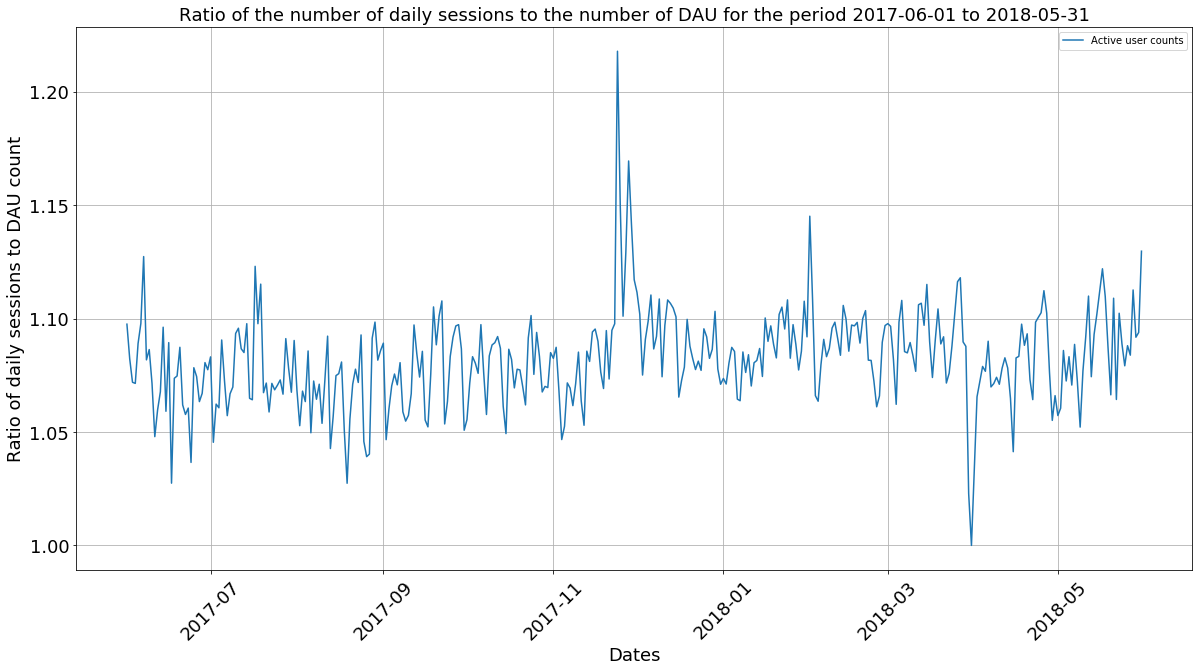

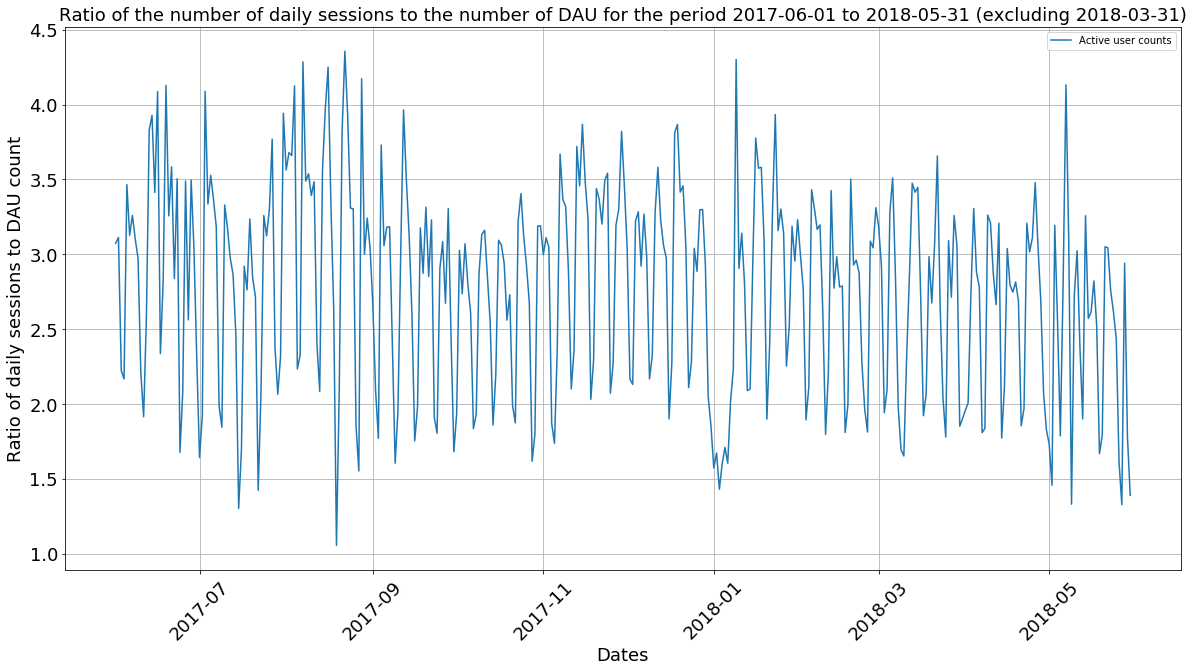

Average of the daily number of sessions per DAU for the period 2017-06-01 to 2018-05-31: 1.08
Average of the daily number of touch to desktop sessions ratios for the same period: 2.77


In [24]:
plt.figure(figsize=(20,10))
plt.plot(daily_sessions['date'], daily_sessions['uid']/dau['dau'], label='Active user counts')
plt.title('Ratio of the number of daily sessions to the number of DAU for the period '
          '2017-06-01 to 2018-05-31', fontsize=18)
plt.xlabel('Dates', fontsize=18)
plt.ylabel('Ratio of daily sessions to DAU count', fontsize=18)
plt.legend()
plt.xticks(fontsize=18, rotation=45)
plt.yticks(fontsize=18)
plt.grid()
plt.show()

cond_4 = daily_sessions['date'].astype(str) == '2018-03-31'
plt.figure(figsize=(20,10))
plt.plot(daily_sessions.loc[~cond_4,'date'], 
         daily_sessions_desktop.loc[~cond_4, 'uid']/daily_sessions_touch.loc[~cond_4,'uid'],
         label='Active user counts')
plt.title('Ratio of the number of daily sessions to the number of DAU for the period '
          '2017-06-01 to 2018-05-31 (excluding 2018-03-31)', fontsize=18)
plt.xlabel('Dates', fontsize=18)
plt.ylabel('Ratio of daily sessions to DAU count', fontsize=18)
plt.legend()
plt.xticks(fontsize=18, rotation=45)
plt.yticks(fontsize=18)
plt.grid()
plt.show()

print('Average of the daily number of sessions per DAU for the period '
          '2017-06-01 to 2018-05-31: {:.2f}'
      .format((daily_sessions['uid']/dau['dau']).mean()))

print('Average of the daily number of touch to desktop sessions ratios '
      'for the same period: {:.2f}'
      .format((daily_sessions_desktop.loc[~cond_4, 'uid']/
               daily_sessions_touch.loc[~cond_4,'uid']).mean()))

The last plots are in line with our previous observations. On average, active users access once our product during a day and our product is almost 3 times more popular on desktop devices than touch screen devices. But how many visitors accessed to our product more than once a day? 

Summary statistics for the number of daily sessions per user:


count    330509.000000
mean          1.087414
std           0.371823
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          10.000000
Name: grp_size, dtype: float64

Summary statistics among active users who visited more than once per day:


count    22572.000000
mean         2.279949
std          0.705680
min          2.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         10.000000
Name: grp_size, dtype: float64

No handles with labels found to put in legend.


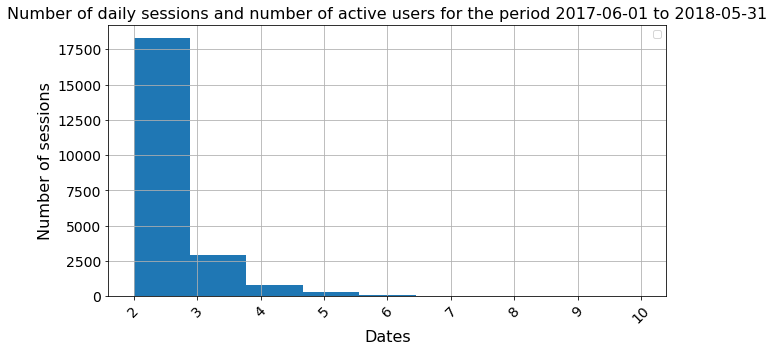

In [25]:
daily_sessions_per_user = visits.groupby(['date','uid']).size().reset_index()
daily_sessions_per_user.rename(columns = {0:'grp_size'}, inplace = True)

print('Summary statistics for the number of daily sessions per user:')
display(daily_sessions_per_user['grp_size'].describe())
print('Summary statistics among active users '
     'who visited more than once per day:')
display(daily_sessions_per_user
        .loc[daily_sessions_per_user['grp_size'] > 1, 'grp_size'].describe())

plt.figure(figsize=(10,5))

plt.hist(daily_sessions_per_user.loc[daily_sessions_per_user['grp_size'] != 1, 'grp_size'],
         label='', bins=9)


plt.title('Number of daily sessions and number of active users for the period '
          '2017-06-01 to 2018-05-31', fontsize=16)
plt.xlabel('Dates', fontsize=16)
plt.ylabel('Number of sessions', fontsize=16)
plt.legend()
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.grid()
plt.show()


We found out that close to 7% of the visit sessions were from returning visitors on a same  day. Most of them accessed to our product twice during the visit date, with only few returning up to 10 times. 

Our analysis leaves us with few questions:
- Is the fact that almost 3 times more user accessed the product from desktop devices an indication that the mobile version of the product needs to be improved? Or is this just a matter of user preference and the nature of the product?
- Is the fact that daily active users access the product only once during the visit date a positive or negative sign? Is the product interface so efficiently working that potential buyers handle their transactions right away? Or, on the opposite, the product interface is so frustrating that they do not return on the same day? 

- *What is the length of each session?*

To find the session durations, we simply need to substract the time the session ended from the time it began. Since analysing them one by one wouldn't be efficient, we will compute and plot the average daily session durations.

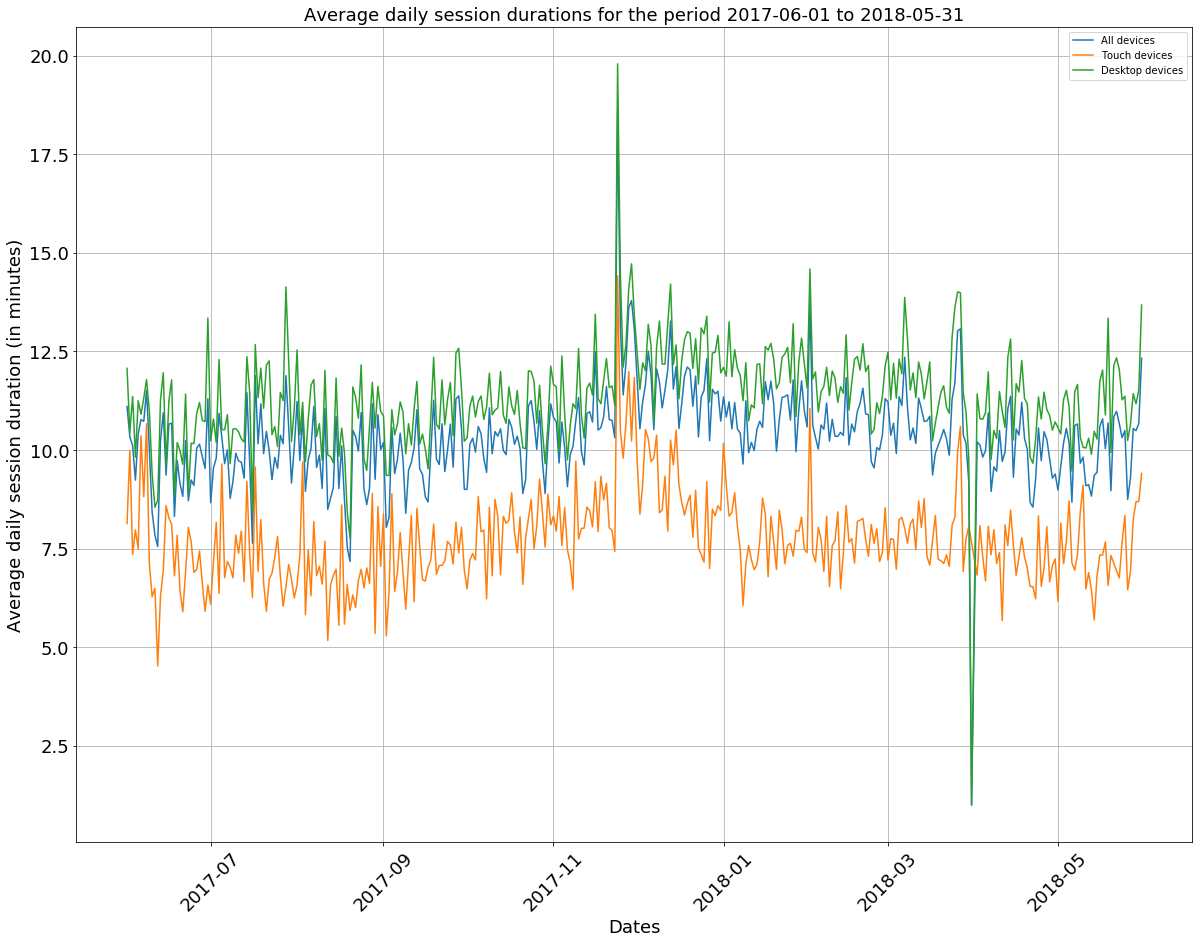

In [26]:
visits['duration'] = (visits['end_ts']-visits['start_ts']).astype('int64')
av_session_durations = visits.groupby('date').agg({'duration': 'mean'}).reset_index()
av_session_durations['duration'] = av_session_durations['duration']/(60*10**9)


av_session_durations_touch = (visits.loc[visits['device']=='touch']
                              .groupby('date').agg({'duration': 'mean'}).reset_index())
av_session_durations_touch['duration'] = av_session_durations_touch['duration']/(60*10**9)



av_session_durations_desktop = (visits.loc[visits['device']=='desktop']
                              .groupby('date').agg({'duration': 'mean'}).reset_index())
av_session_durations_desktop['duration'] = av_session_durations_desktop['duration']/(60*10**9)


plt.figure(figsize=(20,15))
plt.plot(av_session_durations['date'], av_session_durations['duration'] , label='All devices')
plt.plot(av_session_durations_touch['date'], av_session_durations_touch['duration'], 
         label='Touch devices')
plt.plot(av_session_durations_desktop['date'], av_session_durations_desktop['duration'], 
         label='Desktop devices')

plt.title('Average daily session durations for the period 2017-06-01 to 2018-05-31', 
          fontsize=18)
plt.xlabel('Dates', fontsize=18)
plt.ylabel('Average daily session duration (in minutes)', fontsize=18)
plt.legend()
plt.xticks(fontsize=18, rotation=45)
plt.yticks(fontsize=18)
plt.grid()
plt.show()


From the above plot, we can see how the average daily session durations vary in general and according to devices. We observe that not only the majority of users access our product from desktop devices, but these users also spend much more time interacting with our product. Desktop visitors seem to spent in general between 10 to 15 minutes, while the mobile visitors spent in general from 5 to 10 minutes. The seasonal trend is less obvious in the plot of the session durations. Let us find the overall and seasonal averages. 

In [27]:
duration_avg_by_season = ((visits.groupby(['season']).agg({'duration':'mean'}))/(60*10**9)).round(2)
duration_avg = round(visits['duration'].mean()/(60*10**9), 2)

duration_avg_by_device = (((visits.groupby(['season','device'])
                      .agg({'duration':'mean'}))/(60*10**9)).round(2))

desktop_duration_avg = round(visits.loc[visits['device'] == 'desktop','duration'].mean()
                             /(60*10**9), 2)

touch_duration_avg = round(visits.loc[visits['device'] == 'touch','duration'].mean()
                             /(60*10**9), 2)

session_dict = {'session_duration (mins)': [duration_avg_by_season.loc['low', 'duration'], 
                                    duration_avg_by_season.loc['mid', 'duration'],
                                    duration_avg_by_season.loc['high', 'duration'], 
                                    duration_avg], 
                'desktop_duration (mins)':[duration_avg_by_device.loc[('low', 'desktop'),
                                                                        'duration'], 
                                            duration_avg_by_device.loc[('mid', 'desktop'), 
                                                                       'duration'],
                                            duration_avg_by_device.loc[('high', 'desktop'), 
                                                                       'duration'],
                                            desktop_duration_avg],
                'touch_duration (mins)':  [duration_avg_by_device.loc[('low', 'touch'),
                                                                        'duration'], 
                                            duration_avg_by_device.loc[('mid', 'touch'), 
                                                                       'duration'],
                                            duration_avg_by_device.loc[('high', 'touch'), 
                                                                       'duration'],
                                            touch_duration_avg]}
session_activity = pd.DataFrame(data=session_dict, 
                  index=['Low Season Average', 'Mid Season Average', 
                         'High Season Average', 'Overall Average'])

display(session_activity)

,session_duration (mins),desktop_duration (mins),touch_duration (mins)
Low Season Average,9.97,10.89,7.32
Mid Season Average,10.08,11.13,7.40
High Season Average,11.08,12.09,8.33
Overall Average,10.72,11.72,7.99


As we had observed in the plot showing the change in the average daily session durations, the seasonal trend is much less obvious. We believe this is a good sign for our product in the sense that increased visitor access do not significantly slow down users' experience. The slight increases might be due to the increased number of choices according to increased demand.

- *How often do users come back?*

In [28]:
#### ЗДЕСЬ С VISTS все нормально
visits

,device,end_ts,source_id,start_ts,uid,date,week,month,year,season,duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,2017-01-01,high,1080000000000
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,2018-01-01,high,1680000000000
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017-01-01,low,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,2018-01-01,mid,1440000000000
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,2017-01-01,high,0
...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,2017-07-27,2017-07-01,2017-01-01,low,19000000000
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,2018-01-25,2018-01-01,2018-01-01,high,19000000000
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,2018-03-01,2018-03-01,2018-01-01,high,19000000000
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,2017-11-02,2017-11-01,2017-01-01,high,19000000000


User behavior for digital products can be analyzed through cohort analysis. The latter allows us to compute and compare metrics for different cohorts over time. To measure how often users come back, a retention rate function can be calculated for each cohorts. For any given cohort, the retention rate function evaluated at a given time period is given by the ratio of the number of active users from the cohort within the specified time period to the initial size of the cohort.

The retention rate tells us how many users from a cohort have remained active compared to their initial number. In the course, we learned that it is important to track this metric for products where the revenue comes directly from users (such as subscription services) or where the primary source of income is advertising. Because in these cases, the longer customers interact with the product, the greater the potential revenue will be or the more impressions the ads will get, respectively. Therefore, the retention rates for Yandex.Afisha users will help us evaluate how the product is performing, since according to our understanding digital advertising is the primary source of income from the product. 

Going back to the rentention rate function, we see that to evaluate the function, we would need to specify: (i) a cohort, and (ii) a time period. Let us start the discussion from the second point. Recall that we have 12 months data. In theory, we can specify any time period within the 12 months to compute its retention rate, but the most common and practical implementations of the function would return daily, weekly, or monthly retention rates. As for the cohort, it is determined by what we are interested in and the available data.

In the context of the retention rate for our product, we will form cohorts based on the users first visit months and also based on the source they come from. We will find daily and monthly retention rates. We first introduce some functions that will be useful for this task and also some tasks in later sections.

In [29]:
def groupby_join_on(original_dataset, groupby_list, agg_dict, rename_col_list):
    
    new_dataset = original_dataset.groupby(by = groupby_list).agg(agg_dict)
    i=0
    for key in agg_dict.keys():
        new_dataset = new_dataset.rename({key:rename_col_list[i]},  axis='columns')
        i+=1
#    return original_dataset.merge(new_dataset, on=groupby_list, how='left') 
    return original_dataset.join(new_dataset, on=groupby_list)

#first_activity_date = visits_rev.groupby(['uid'])['start_ts'].min()
#first_activity_date.name = 'first_activity_date'
#visits_rev = visits_rev.join(first_activity_date, on='uid')

#visits_ = groupby_join_on(visits, ['uid'], {'start_ts':'min'}, ['first_visit_dt'])
     
def count_lifetime(ref_event_datetime_column, event_datetime_column, resolution):
    lifetime_column = pd.Series([], dtype='float64')
    if resolution in ['D', 'W', 'M', 'Y']: 
        if resolution == 'W':
            ref_event_datetime_column = (pd.to_datetime(ref_event_datetime_column, unit='d') 
                                          - pd.to_timedelta(ref_event_datetime_column
                                                            .dt.dayofweek, unit='d'))
            event_datetime_column = (pd.to_datetime(event_datetime_column, unit='d') 
                                          - pd.to_timedelta(event_datetime_column
                                                            .dt.dayofweek, unit='d'))           
        else:
            ref_event_datetime_column = ref_event_datetime_column.astype('datetime64[{}]'
                                                                         .format(resolution))
            event_datetime_column = event_datetime_column.astype('datetime64[{}]'
                                                                 .format(resolution))
        
    lifetime_column = (event_datetime_column - ref_event_datetime_column)
    lifetime_column = lifetime_column / np.timedelta64(1, resolution) 
    lifetime_column = lifetime_column.round().astype(int)  #REMOVE ROUND() AFTER DEBUG
    return lifetime_column

def groupby_agg(activity_dataset, groupby_list, agg_dict):
    new_dataset = activity_dataset.groupby(groupby_list).agg(agg_dict).reset_index() 
    i=0
    for key in agg_dict.keys():
        new_dataset = new_dataset.rename({key:'{}_{}'.format(key, agg_dict[key])}, 
                                         axis='columns')
        i+=1
    return new_dataset







We start by adding the first visit dates of the users to the `visits` dataset.

In [30]:
visits_ = visits.copy()
visits_ = groupby_join_on(visits, ['uid'], {'start_ts':'min'}, ['first_visit_dt'])

Now we compute and display the 0, 1, 2, 7, 14, 30 days retention rates by first visit month cohorts and source cohorts.

In [31]:
# Compute and display monthly retetention rates by first_visit_month cohorts
cohorts_period = 'M' 
lifetime_res = 'D'
cohorts_by = 'first_visit_{}'.format(cohorts_period) # or source_id
cast_str = 'datetime64[{}]'.format(cohorts_period)
groupby_str = 'first_visit_{}'.format(cohorts_period)

visits_['lifetime'] = count_lifetime(visits_['first_visit_dt'], visits_['start_ts'], 
                                     lifetime_res)
visits_.loc[visits_['first_visit_dt'] == visits_['start_ts'], 'lifetime'] = -1
# display(visits_.head(10))

visits_counts = visits_.copy()
visits_counts['first_visit_dt'] = visits_counts['first_visit_dt'].astype(cast_str)
visits_counts['first_visit_dt'] = visits_counts['first_visit_dt'].dt.strftime('%Y-%m')
visits_counts = visits_counts.rename({'first_visit_dt':groupby_str},  axis='columns')
visits_counts = groupby_agg(visits_counts, [groupby_str, 'lifetime'], {'uid':'nunique'})
# display(visits_counts.head(10))



initial_counts = visits_counts[visits_counts['lifetime'] == -1][[cohorts_by, 'uid_nunique']]
initial_counts = initial_counts.rename(columns={'uid_nunique': 'cohort_size'})
visits_counts = visits_counts.merge(initial_counts, on=cohorts_by) 
# display(visits_counts.head())

visits_counts['retention_{}'.format(lifetime_res)] = (visits_counts['uid_nunique'] 
                                                    / visits_counts['cohort_size'])
# display(visits_counts.head())

daily_retention_by_first_pivot = visits_counts.pivot_table(
        index = cohorts_by,
        columns = 'lifetime',
        values = 'retention_{}'.format(lifetime_res),
        aggfunc= 'sum',
    )

# display(daily_retention_by_first_pivot.head())

daily_retention_by_first_pivot.drop(-1, axis=1, inplace=True)

daily_rentention_by_first_table = round(
    daily_retention_by_first_pivot.iloc[:, [0, 1, 2, 7, 14, 30]]*100, 2)
daily_rentention_by_first_table.columns = ['0 day', '1 day', '2 days', 
                                           '7 days', '14 days', '30 days']
printmd('Daily retention rates (%) for the visits by first visit months', color='red')
display(daily_rentention_by_first_table)


<span style='color:red'>Daily retention rates (%) for the visits by first visit months</span>

,0 day,1 day,2 days,7 days,14 days,30 days
first_visit_M,,,,,,
2017-06,4.52,2.81,1.39,0.88,0.70,0.43
2017-07,4.58,2.56,1.37,0.58,0.49,0.22
2017-08,3.62,1.79,0.98,0.61,0.34,0.32
2017-09,4.42,2.39,1.07,0.59,0.53,0.32
2017-10,4.71,2.69,1.36,0.68,0.55,0.32
2017-11,5.36,3.19,1.90,0.93,0.76,0.27
2017-12,4.53,2.75,1.46,0.63,0.38,0.25
2018-01,4.13,2.39,1.33,0.51,0.44,0.19
2018-02,4.28,2.34,1.19,0.63,0.45,0.19


Based on the above table, we observe that the daily retention rates by first visit months are quite low for all the cohorts. The same day retention rates, i.e., '0 day' column, range somewhere between 3.62% to 5.36% for all the cohorts. Then, on the following day, the retention rates drop significantly below 3.19% and steadily continue dropping as we move to the second, seventh, and 30th day following user's registration date to our product. Therefore, we infer that most users visit our product on the registration date and then forget about it. Let us see what happens to the daily retention rates when we build cohorts based on the source ids.

Although we do not observe the seasonal trends clear cut, the daily retention rates of the November 2017 cohort are higher within the first two days than the other cohorts. However, the retention rates of this cohort also drops in the 7th, 14th, and 30th days, and becomes at the end even lower than the earlier cohorts of 2017. Maybe the visitors from this cohorts made a lot of purchases within the first few days, and therefore did not return later on.  

In [32]:
# Compute and display monthly retetention rates by source_id cohorts

cohorts_period = 'M' 
lifetime_res = 'D'
cohorts_by = 'source_id' # or source_id
cast_str = 'datetime64[{}]'.format(cohorts_period)
groupby_str = 'first_visit_{}'.format(cohorts_period)

visits_['lifetime'] = count_lifetime(visits_['first_visit_dt'], 
                                     visits_['start_ts'], lifetime_res)
visits_.loc[visits_['first_visit_dt'] == visits_['start_ts'], 'lifetime'] = -1
 

visits_counts = visits_.copy()
visits_counts.sort_values(by = 'start_ts')
visits_counts = groupby_agg(visits_counts, [cohorts_by, 'lifetime'], {'uid':'nunique'})
 
initial_counts = visits_.groupby(by = cohorts_by)['uid'].nunique()
initial_counts.name = 'cohort_size'

visits_counts = visits_counts.merge(initial_counts, on=cohorts_by) 

visits_counts['retention_{}'.format(lifetime_res)] = (visits_counts['uid_nunique'] 
                                                    / visits_counts['cohort_size'])
daily_retention_by_source_pivot = visits_counts.pivot_table(
        index = cohorts_by,
        columns = 'lifetime',
        values = 'retention_{}'.format(lifetime_res),
        aggfunc= 'sum',
    )
daily_retention_by_source_pivot.drop(-1, axis=1, inplace=True)

daily_rentention_by_source_table = round(
    daily_retention_by_source_pivot.iloc[:, [0, 1, 2, 7, 14, 30]]*100, 2)
daily_rentention_by_source_table.columns = ['0 day', '1 day', '2 days', 
                                            '7 days', '14 days', '30 days']
printmd('Daily retention rates (%) for the visits by source id', color='red')
display(daily_rentention_by_source_table)


<span style='color:red'>Daily retention rates (%) for the visits by source id</span>

,0 day,1 day,2 days,7 days,14 days,30 days
source_id,,,,,,
1,17.68,8.79,3.42,1.26,0.86,0.42
2,5.20,4.64,2.48,1.37,1.07,0.48
3,1.49,1.26,0.65,0.27,0.22,0.12
4,1.82,1.63,0.94,0.49,0.31,0.18
5,5.62,1.45,0.73,0.35,0.26,0.13
6,16.67,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
9,1.14,1.23,1.01,0.81,0.92,0.38
10,3.00,2.32,1.43,0.52,0.35,0.12


As for the daily retention rates by source cohorts, we can see that although the same day retention rates vary considerably across sources, the variations become less and less significant as the daily retention rates drop close to zero 30 days after registration. Two sources stands out for the same day retention: first and sixth sources. Almost 18% of the user that come from the first source visit the product at least one more time on the same day, while close to 17% of the users coming from source 6 return on the same day. 

These are followed by source 5 with a same day retention rate around 5.6% and source 2 with a retention rate around 5.2%. For all other sources, the same day retention rates by source ids are below 3%. Daily retention rates for our choices are null valued for Source 7. So, source 7 do not bring our product any visitors or buyers. Similarly except for the same day retention rate, the other daily retention rates for source 6 are null valued. Therefore, source 6 seems to be only effective for the same day registration. 

Let us also compute and display the monthly retention rates by both types of cohorts. 

In [33]:
#### Grigoriy's example
visits_rev = visits.copy() # Make this part independent from your project
first_activity_date = visits_rev.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'
visits_rev = visits_rev.join(first_activity_date, on='uid')
visits_rev['activity_month'] = visits_rev['date'].astype('datetime64[M]')
visits_rev['first_activity_month'] = visits_rev['first_activity_date'].astype('datetime64[M]')
visits_rev['cohort_lifetime'] = visits_rev['activity_month'] - visits_rev['first_activity_month']
visits_rev['cohort_lifetime'] = visits_rev['cohort_lifetime'] / np.timedelta64(1, 'M')
visits_rev['cohort_lifetime'] = visits_rev['cohort_lifetime'].round().astype('int')

cohorts = visits_rev.groupby(['first_activity_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
cohorts = cohorts.merge(initial_users_count, on='first_activity_month')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

retention_pivot = cohorts.pivot_table(index='first_activity_month', columns='cohort_lifetime', values='retention',\
                                      aggfunc='sum')
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style='color:red'>Monthly retention rates (%) for the visits by first visit months</span>

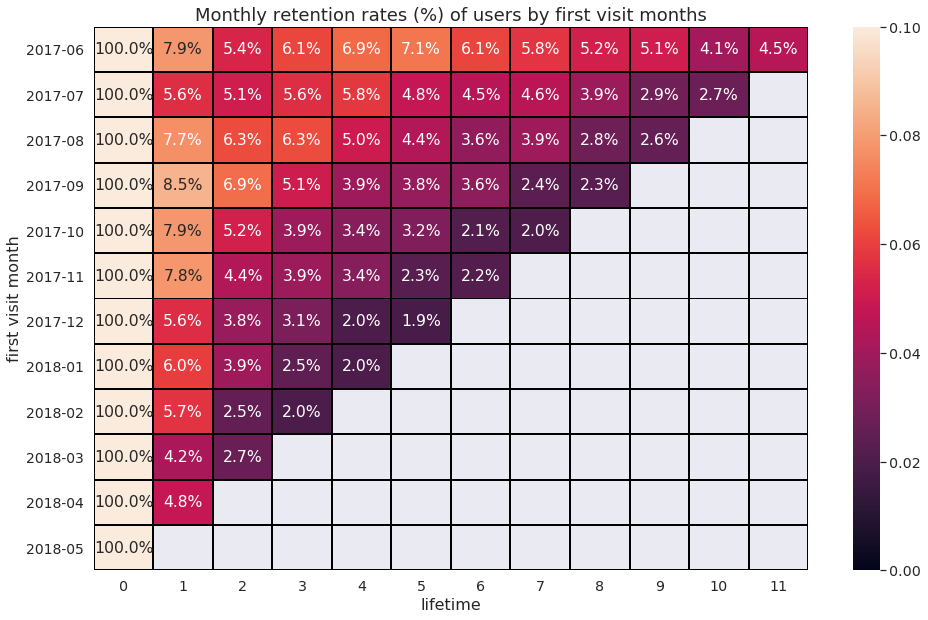

In [34]:
visits_ = visits.copy() # Make this part independent from your project
first_visit_dt = visits_.groupby(['uid'])['start_ts'].min()
first_visit_dt.name = 'first_visit_dt'
visits_ = visits_.join(first_visit_dt, on='uid')
# display(visits_.head())

cohorts_period = 'M' 
lifetime_res = 'M'
cohorts_by = 'first_visit_{}'.format(cohorts_period) # or source_id
cast_str = 'datetime64[{}]'.format(cohorts_period)
groupby_str = 'first_visit_{}'.format(cohorts_period)

visits_['lifetime'] = count_lifetime(visits_['first_visit_dt'], visits_['start_ts'], 
                                lifetime_res)
# display(visits_.head())

visits_counts = visits_.copy()
visits_counts['first_visit_dt'] = visits_counts['first_visit_dt'].astype(cast_str)
visits_counts['first_visit_dt'] = visits_counts['first_visit_dt'].dt.strftime('%Y-%m') #
#visits_counts['first_visit_dt'] = visits_counts['first_visit_dt'].astype('datetime64[M]')


visits_counts = visits_counts.rename({'first_visit_dt':groupby_str},  axis='columns')
# display(visits_counts.head())

visits_counts = groupby_agg(visits_counts, [groupby_str, 'lifetime'], {'uid':'nunique'})
# visits_counts = visits_.groupby(['first_visit_M', 'lifetime']).agg({'uid':'nunique'}).reset_index()

# display(visits_counts.head(10))

initial_counts = visits_counts[visits_counts['lifetime'] == 0][[cohorts_by, 'uid_nunique']]
initial_counts = initial_counts.rename(columns={'uid_nunique': 'cohort_size'})
visits_counts = visits_counts.merge(initial_counts, on=cohorts_by) 
# display(visits_counts.head())

visits_counts['retention_{}'.format(lifetime_res)] = (visits_counts['uid_nunique'] 
                                                    / visits_counts['cohort_size'])
# display(visits_counts.head())

weekly_retention_by_first_pivot = visits_counts.pivot_table(
        index = cohorts_by,
        columns = 'lifetime',
        values = 'retention_{}'.format(lifetime_res),
        aggfunc= 'sum',
    )

# weekly_retention_by_first_pivot.drop(-1, axis=1, inplace=True)


printmd('Monthly retention rates (%) for the visits by first visit months', color='red')
# display(weekly_retention_by_first_pivot)

# Display heatmap of retention
sns.set(style='white')
sns.set(font_scale=1.3) 
plt.figure(figsize=(16, 10))
plt.title('Monthly retention rates (%) of users by first visit months', fontsize=18)
ax = sns.heatmap(weekly_retention_by_first_pivot, 
           annot=True, fmt='.1%', linewidths=1, linecolor='black', vmin=0, vmax=0.1)
ax.tick_params(axis='y', rotation=0, labelsize=14)
ax.set_xlabel('lifetime', fontsize=16)
ax.set_ylabel('first visit month', fontsize=16)

plt.show()


<span style='color:red'>Monthly retention rates (%) for the visits by source id</span>

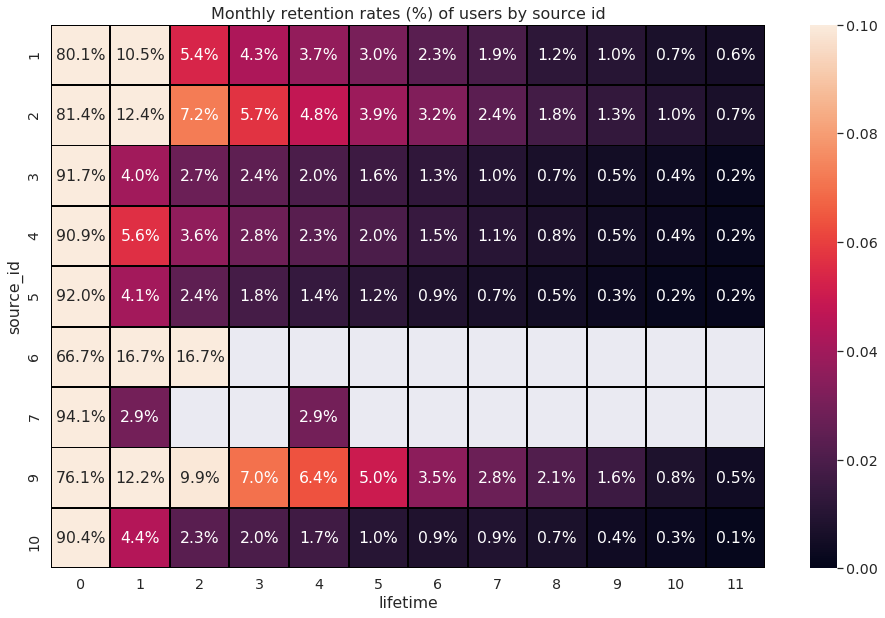

In [35]:
# Compute and display monthly retetention rates by source_id cohorts

cohorts_period = 'M' 
lifetime_res = 'M'
cohorts_by = 'source_id' # or source_id
cast_str = 'datetime64[{}]'.format(cohorts_period)
groupby_str = 'first_visit_{}'.format(cohorts_period)

visits_['lifetime'] = count_lifetime(visits_['first_visit_dt'], visits_['start_ts'], 
                                     lifetime_res)
#visits_.loc[visits_['first_visit_dt'] == visits_['start_ts'], 'lifetime'] = -1
 

visits_counts = visits_.copy()
visits_counts.sort_values(by = 'start_ts')
visits_counts = groupby_agg(visits_counts, [cohorts_by, 'lifetime'], {'uid':'nunique'})
 
initial_counts = visits_.groupby(by = cohorts_by)['uid'].nunique()
initial_counts.name = 'cohort_size'

visits_counts = visits_counts.merge(initial_counts, on=cohorts_by) 

visits_counts['retention_{}'.format(lifetime_res)] = (visits_counts['uid_nunique'] 
                                                    / visits_counts['cohort_size'])
monthly_retention_by_source_pivot = visits_counts.pivot_table(
        index = cohorts_by,
        columns = 'lifetime',
        values = 'retention_{}'.format(lifetime_res),
        aggfunc= 'sum',
    )
#monthly_retention_by_source_pivot.drop(-1, axis=1, inplace=True)

printmd('Monthly retention rates (%) for the visits by source id', color='red')
# display(monthly_retention_by_source_pivot)

# Display heatmap of retention
sns.set(style='white')
sns.set(font_scale=1.3) 
plt.figure(figsize=(16, 10))
plt.title('Monthly retention rates (%) of users by source id', fontsize=16)
sns.heatmap(monthly_retention_by_source_pivot, 
           annot=True, fmt='.1%', linewidths=1, linecolor='black', vmin=0, vmax=0.1)
ax.tick_params(axis='y', rotation=0, labelsize=14)
ax.set_xlabel('lifetime', fontsize=16)
ax.set_ylabel('source id', fontsize=16)

plt.show()


The heatmaps of the monthly retention rates by first visit months and source id do further suppport our finding that the majority of the users do not come back to visit our prodcut after they register. However, the last heatmap reveals that the monthly retention rates of source 9 outperform source 1 in the second and third months after registration. Thus, the retention pattern of users by source cohorts can vary depending on the lifetime period. Souce 9 whose daily retention rates were very poor had considerably better monthly retention rates for first few months after registration. 

Let us now calculate the average monthly retention rates for the visitors.

In [36]:
av_ret_month1 = visits_.loc[visits_['lifetime'] == 1].agg({'uid':'nunique'})/visits_['uid'].nunique()

print('The average monthly retention rate for the second month of cohort life is',
      round(av_ret_month1.iloc[0]*100,1))

The average monthly retention rate for the second month of cohort life is 6.1


We found out that for the second month of source cohort's life, the average retention rate is 6.1%, which is rather low. Comparing this average with the heatmap we conclude that sources 1, 2, and 9 were more effective in retaining the cohorts users. 

<a class="anchor" id="step2_2"></a> 
#### Step 2.3. Sales analysis:

In this section, we turn our attention to the sales performance of our product. Visitors are good, but buyers are even better!

- *When do people start buying?*

We investigate this question by finding users' daily convertion rates. As in the case of the retention rate, we work both with first visit month and source cohorts. 

We will work with both the `visits` and `orders` datasets. First, we find the first order dates of users, if it exists.

In [37]:
orders_= groupby_join_on(orders, ['uid'], {'buy_ts':'min'}, ['first_order_dt'])
display(orders_.info())
display(visits_.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 4 columns):
buy_ts            50415 non-null datetime64[ns]
revenue           50415 non-null float64
uid               50415 non-null uint64
first_order_dt    50415 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), uint64(1)
memory usage: 1.5 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 13 columns):
device            359400 non-null category
end_ts            359400 non-null datetime64[ns]
source_id         359400 non-null int64
start_ts          359400 non-null datetime64[ns]
uid               359400 non-null uint64
date              359400 non-null datetime64[ns]
week              359400 non-null datetime64[ns]
month             359400 non-null datetime64[ns]
year              359400 non-null datetime64[ns]
season            359400 non-null object
duration          359400 non-null int64
first_visit_dt    359400 non-null datetime64[ns]
lifetime          359400 non-null int64
dtypes: category(1), datetime64[ns](7), int64(3), object(1), uint64(1)
memory usage: 33.2+ MB


None

Next, we compute the number of days between the first order dates and the first visit dates of users. If no orders were place, we simply assign null to the lifetime difference. 

In [38]:
visits_orders_ = orders_.merge(visits_, on='uid', how='outer')

visits_orders_converted = visits_orders_.loc[
    ~visits_orders_['first_order_dt'].isnull()].copy()
visits_orders_not_converted = visits_orders_.loc[
    visits_orders_['first_order_dt'].isnull()].copy()

visits_orders_not_converted['lifetime'] = np.nan

lifetime_res = 'D'
visits_orders_converted['lifetime'] = count_lifetime(visits_orders_converted['first_visit_dt'],
                                visits_orders_converted['first_order_dt'], lifetime_res)

visits_orders_ = pd.concat([visits_orders_converted, visits_orders_not_converted])

display(visits_orders_.head())


,buy_ts,revenue,uid,first_order_dt,device,end_ts,source_id,start_ts,date,week,month,year,season,duration,first_visit_dt,lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017-06-01,2017-06-01,2017-06-01,2017-01-01,low,120000000000,2017-06-01 00:09:00,0.0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,2017-06-01,2017-06-01,2017-06-01,2017-01-01,low,660000000000,2017-06-01 00:14:00,0.0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01,2017-01-01,low,540000000000,2017-06-01 00:25:00,0.0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017-06-01,2017-06-01,2017-06-01,2017-01-01,low,1140000000000,2017-06-01 00:14:00,0.0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017-06-01,2017-06-01,2017-06-01,2017-01-01,low,1680000000000,2017-06-01 07:31:00,0.0


Now, very similar to the retention rate computations, we find the daily conversion rates of users.

In [39]:
lifetime_res = 'D'
cohort_period = 'M'
cohorts_by = 'first_visit_{}'.format(cohort_period) # or source_id
cast_str = 'datetime64[{}]'.format(cohort_period)
groupby_str = 'first_visit_{}'.format(cohort_period)

visits_orders_counts = visits_orders_.copy()
visits_orders_counts['first_visit_dt'] = (visits_orders_counts['first_visit_dt']
                                          .astype(cast_str))


visits_orders_counts = visits_orders_counts.rename(
    {'first_visit_dt':groupby_str},  axis='columns')

visits_orders_counts = groupby_agg(visits_orders_counts, 
                                   [groupby_str, 'lifetime'], 
                                   {'uid':'nunique'})
visits_counts = visits_.copy()
visits_counts['first_visit_dt'] = visits_counts['first_visit_dt'].astype(cast_str)
visits_counts = visits_counts.rename({'first_visit_dt':groupby_str},  axis='columns')
visits_counts = groupby_agg(visits_counts, [groupby_str, 'lifetime'], {'uid':'nunique'})
# display(visits_counts.head(10))

initial_counts = visits_counts[visits_counts['lifetime'] == 0][[cohorts_by, 'uid_nunique']]
initial_counts = initial_counts.rename(columns={'uid_nunique': 'cohort_size'})
# display(initial_counts.head())

visits_orders_counts = visits_orders_counts.merge(initial_counts, on=cohorts_by) 
# display(visits_orders_counts.head())

visits_orders_counts['conversion_{}'.format(lifetime_res)] = (
    visits_orders_counts['uid_nunique'] / visits_orders_counts['cohort_size'])

display(visits_orders_counts.head())


,first_visit_M,lifetime,uid_nunique,cohort_size,conversion_D
0,2017-06-01,0.0,1716,13259,0.129422
1,2017-06-01,1.0,121,13259,0.009126
2,2017-06-01,2.0,36,13259,0.002715
3,2017-06-01,3.0,29,13259,0.002187
4,2017-06-01,4.0,32,13259,0.002413


Using the daily conversion rate table we found, let us compute the conversion rates of the cohorts till 0, 1, 2, 7, 30 days. Note that since a user can only convert once, we can find convertion till x number of days of a given chohort by simply summing up all daily convertion rates up to and including day x.

In [40]:
conversion_pivot = visits_orders_counts.pivot_table(
        index = cohorts_by,
        columns = 'lifetime',
        values = 'conversion_{}'.format(lifetime_res),
        aggfunc= 'sum',
    )
conversion_pivot = conversion_pivot.fillna(0)

conversion_table = conversion_pivot.cumsum(axis=1)
conversion_table.columns =  conversion_table.columns.astype('int')
conversion_table.index = conversion_table.index.strftime('%Y-%m')


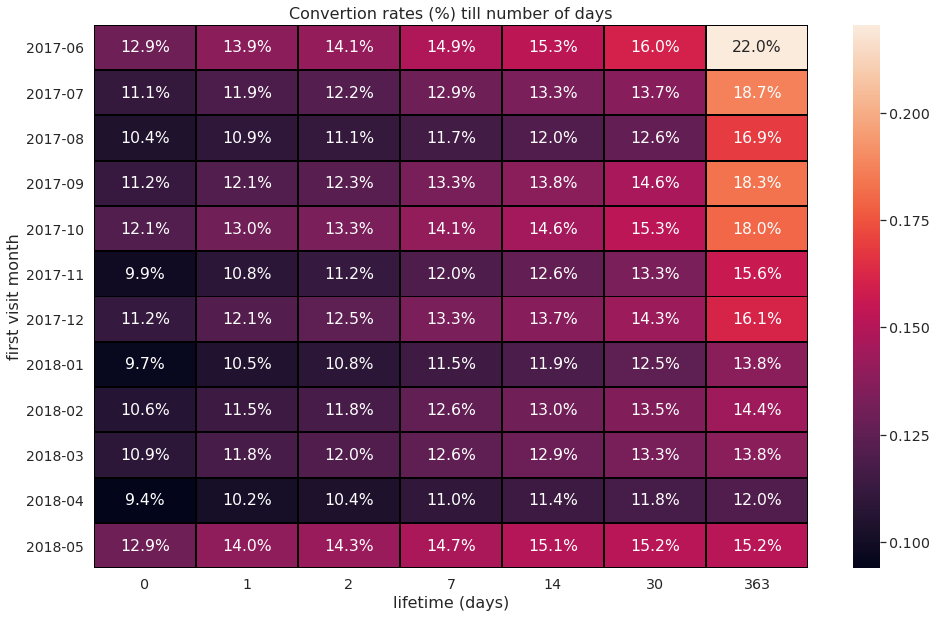

In [41]:
# Display heatmap of retention
sns.set(style='white')
sns.set(font_scale=1.3) 
plt.figure(figsize=(16, 10))
plt.title('Convertion rates (%) till number of days', fontsize=16)
ax = sns.heatmap(conversion_table.iloc[:, [0, 1, 2, 7, 14, 30, -1]], 
           annot=True, fmt='.1%', linewidths=1, linecolor='black') 
ax.set_xlabel('lifetime (days)', fontsize=16)
ax.tick_params(axis='y', rotation=0, labelsize=14)
ax.set_ylabel('first visit month', fontsize=16)

plt.show()



From the above heatmap, we can see that around 10% to 15% of the users converted within the first month after registration. In addition, for the majority of the users conversion takes place on the day of registration. In fact, the convertion rates of the cohorts improved just slightly after a year, with only about one fifth of the cohorts at most having made orders. 

We continue the analysis with the source id cohorts.

In [42]:
lifetime_res = 'D'
cohort_period = 'M'
cohorts_by = 'source_id'
cast_str = 'datetime64[{}]'.format(cohort_period)
groupby_str = 'first_visit_{}'.format(cohort_period)

visits_orders_counts = visits_orders_.copy()
visits_orders_counts['first_visit_dt'] = (visits_orders_counts['first_visit_dt']
                                          .astype(cast_str))


visits_orders_counts = visits_orders_counts.rename(
    {'first_visit_dt':groupby_str},  axis='columns')

visits_orders_counts = groupby_agg(visits_orders_counts, 
                                   [cohorts_by, 'lifetime'], 
                                   {'uid':'nunique'})

# display(visits_orders_counts.head())


initial_counts = visits_.groupby(by = cohorts_by)['uid'].nunique()
initial_counts.name = 'cohort_size'
# display(initial_counts.head())

visits_orders_counts = visits_orders_counts.join(initial_counts, on=cohorts_by) 
# display(visits_orders_counts.head())

visits_orders_counts['conversion_{}'.format(lifetime_res)] = (
    visits_orders_counts['uid_nunique'] / visits_orders_counts['cohort_size'])

display(visits_orders_counts.head())


,source_id,lifetime,uid_nunique,cohort_size,conversion_D
0,1,0.0,3794,18999,0.199695
1,1,1.0,619,18999,0.032581
2,1,2.0,214,18999,0.011264
3,1,3.0,126,18999,0.006632
4,1,4.0,106,18999,0.005579


Here again, we compute the conversion rates of the cohorts till 0, 1, 2, 7, 30 days by using the daily conversion rates we found above.

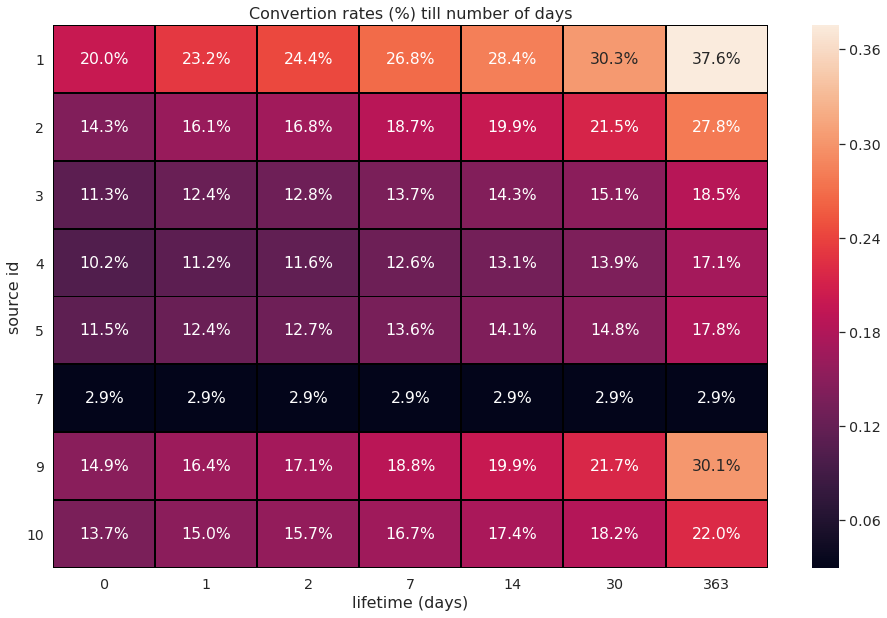

In [43]:
conversion_pivot = visits_orders_counts.pivot_table(
        index = cohorts_by,
        columns = 'lifetime',
        values = 'conversion_{}'.format(lifetime_res),
        aggfunc= 'sum',
    )
conversion_pivot = conversion_pivot.fillna(0)

conversion_table = conversion_pivot.cumsum(axis=1)
conversion_table.columns =  conversion_table.columns.astype('int')

# Display heatmap 
sns.set(style='white')
sns.set(font_scale=1.3) 
plt.figure(figsize=(16, 10))
plt.title('Convertion rates (%) till number of days', fontsize=16)
ax = sns.heatmap(conversion_table.iloc[:, [0, 1, 2, 7, 14, 30, -1]], 
           annot=True, fmt='.1%', linewidths=1, linecolor='black') 
ax.set_xlabel('lifetime (days)', fontsize=16)
ax.tick_params(axis='y', rotation=0, labelsize=14)
ax.set_ylabel('source id', fontsize=16)

plt.show()



We see that the same day convertion rates of all sources, except source 7, vary between around 10% to 23%. The convertion rates steadily improves, except for source 7. For sources 1, 2, and 9 around one third of the cohorts converted at the end of the one year period, showing these sources were more effective than the others in terms of convertion rates. 

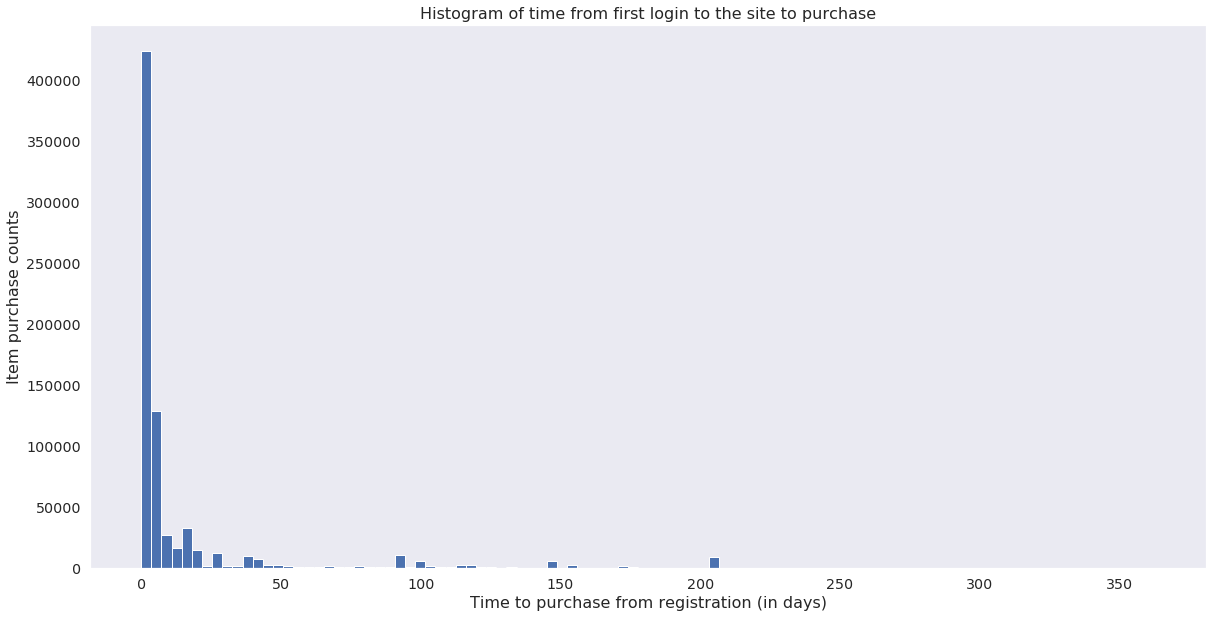

In [44]:
# Plot histogram
plt.figure(figsize=(20, 10))
plt.hist(visits_orders_converted['lifetime'], bins=100)
plt.title('Histogram of time from first login to the site to purchase', fontsize=16)
plt.xlabel('Time to purchase from registration (in days)', fontsize=16)
plt.ylabel('Item purchase counts', fontsize=16)
plt.grid()
plt.show()


We see that the distribution is concentrated on the first few days after registration. Over 400000 product sales occured on the first 4 days after registrations. In the remaining days of the first week after registrations around 125000 more products were sold. Then, we see that some more products were sold throughout the year, especially till day 50 (ca. first two months), but the amounts were always below (and usually much below) the 50000 threshold. This reveals that the effectiveness of the sources in the first week after registration is very important for sales performance. 

- *How many orders do they make during a given period of time?*

To answer this question, we count the number of purchases placed after the registration date. We also compute the ratio of the number of orders to the size of the cohorts to find the number of orders per cohort users. 

Let us start by selecting the customer acquisition source. At different occasions users might have come from different sources. We select the most frequent one as the cohort source.

In [45]:
visits_grp = visits_.groupby('uid').agg({'source_id':'count'}).reset_index()
cond_unique = visits_grp.loc[visits_grp['source_id'] == 1]

visits_1 = visits_.loc[visits_['uid'].isin(cond_unique['uid'])].copy()
visits_1['CA_source'] = visits_1['source_id']

visits_2 = visits_[~visits_['uid'].isin(cond_unique['uid'])].copy()
visits_2['CA_source'] = visits_2.groupby('uid')['source_id'].transform(lambda x:
                                                                          x.mode().iloc[0])

visits_ = visits_1.append(visits_2)
display(visits_.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 359400 entries, 0 to 359399
Data columns (total 14 columns):
device            359400 non-null category
end_ts            359400 non-null datetime64[ns]
source_id         359400 non-null int64
start_ts          359400 non-null datetime64[ns]
uid               359400 non-null uint64
date              359400 non-null datetime64[ns]
week              359400 non-null datetime64[ns]
month             359400 non-null datetime64[ns]
year              359400 non-null datetime64[ns]
season            359400 non-null object
duration          359400 non-null int64
first_visit_dt    359400 non-null datetime64[ns]
lifetime          359400 non-null int64
CA_source         359400 non-null int64
dtypes: category(1), datetime64[ns](7), int64(4), object(1), uint64(1)
memory usage: 38.7+ MB


None

In [46]:
visits_orders_ = orders_.copy()
visits_orders_ = orders_.merge(visits_[['uid', 'first_visit_dt', 'CA_source']]
                               .drop_duplicates(subset=['uid', 'first_visit_dt']), on='uid', how='left')
display(visits_orders_.info())

lifetime_res = 'M'
visits_orders_['lifetime'] = count_lifetime(visits_orders_['first_visit_dt'],
                                visits_orders_['first_order_dt'], lifetime_res)
display(visits_orders_.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 6 columns):
buy_ts            50415 non-null datetime64[ns]
revenue           50415 non-null float64
uid               50415 non-null uint64
first_order_dt    50415 non-null datetime64[ns]
first_visit_dt    50415 non-null datetime64[ns]
CA_source         50415 non-null int64
dtypes: datetime64[ns](3), float64(1), int64(1), uint64(1)
memory usage: 2.7 MB


None

,buy_ts,revenue,uid,first_order_dt,first_visit_dt,CA_source,lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,1,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,2,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,2,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,3,0


In [47]:
lifetime_res = 'M'
cohort_period = 'M'
cohorts_by = 'first_visit_{}'.format(cohort_period) # or source_id
cast_str = 'datetime64[{}]'.format(cohort_period)
groupby_str = 'first_visit_{}'.format(cohort_period)


# orders_['lifetime'] = count_lifetime(orders_['first_order_dt'], orders_['buy_ts'],  lifetime_res)

orders_counts = visits_orders_.copy()
orders_counts['first_visit_dt'] = (orders_counts['first_visit_dt']
                                          .astype(cast_str))
orders_counts = orders_counts.rename(
    {'first_visit_dt':groupby_str},  axis='columns')

orders_counts = groupby_agg(orders_counts, 
                                   [groupby_str, 'lifetime'], 
                                   {'uid':'nunique', 'buy_ts':'count', 'revenue':'sum'})
# display(orders_counts.head())


initial_counts = orders_counts[orders_counts['lifetime'] == 0][[cohorts_by, 'uid_nunique']]
initial_counts = initial_counts.rename(columns={'uid_nunique': 'cohort_size'})

orders_counts_by_first = orders_counts.merge(initial_counts, on=cohorts_by) 

orders_counts_by_first['purchases_{}'.format(lifetime_res)] = (orders_counts_by_first['buy_ts_count'] 
                                                    / orders_counts_by_first['cohort_size'])

display(orders_counts_by_first.head())



,first_visit_M,lifetime,uid_nunique,buy_ts_count,revenue_sum,cohort_size,purchases_M
0,2017-06-01,0,2023,4438,24031.69,2023,2.193772
1,2017-06-01,1,170,529,4337.55,2023,0.261493
2,2017-06-01,2,67,134,755.83,2023,0.066238
3,2017-06-01,3,107,335,4483.70,2023,0.165596
4,2017-06-01,4,119,241,1348.21,2023,0.119130


Let us first find the total number of orders placed by cohort users till all the months after registration.

In [48]:
purchases_pivot = orders_counts_by_first.pivot_table(
        index = cohorts_by,
        columns = 'lifetime',
        values = 'buy_ts_count'.format(lifetime_res),
        aggfunc= 'sum',
    )

purchases_pivot = purchases_pivot.fillna(0)
purchases_table = purchases_pivot.cumsum(axis=1)
purchases_table.columns =  purchases_table.columns.astype('int')
purchases_table.index = purchases_table.index.strftime('%Y-%m')


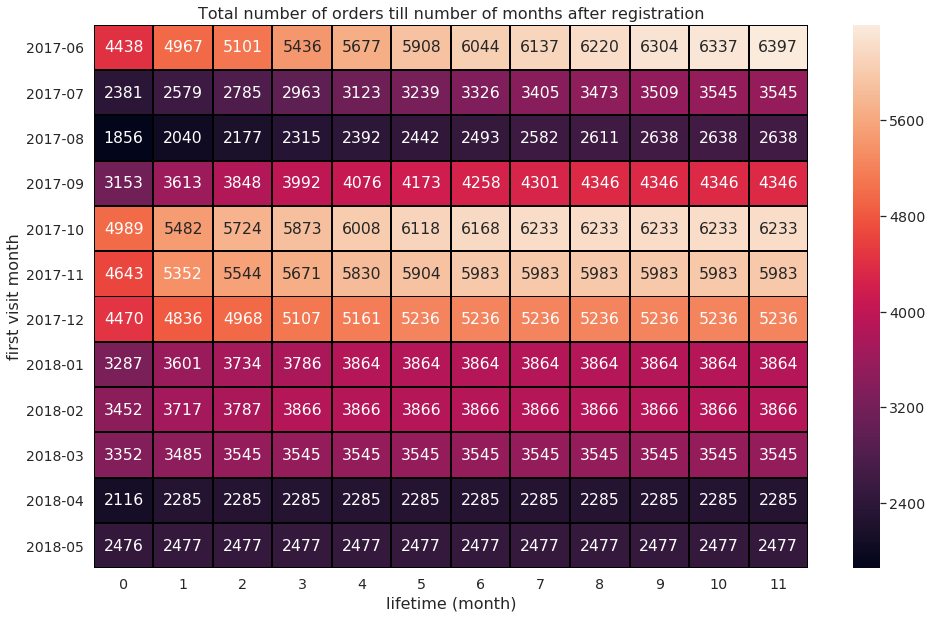

In [49]:
# Display heatmap 
sns.set(style='white')
sns.set(font_scale=1.3) 
plt.figure(figsize=(16, 10))
plt.title('Total number of orders till number of months after registration', fontsize=16)
ax = sns.heatmap(purchases_table, 
           annot=True, fmt='.0f', linewidths=1, linecolor='black') 
ax.set_xlabel('lifetime (month)', fontsize=16)
ax.tick_params(axis='y', rotation=0, labelsize=14)
ax.set_ylabel('first visit month', fontsize=16)

plt.show()


Let us now find the average number of purchases per cohort users till all the months after registration. 

In [50]:
purchases_pivot = orders_counts_by_first.pivot_table(
        index = cohorts_by,
        columns = 'lifetime',
        values = 'purchases_{}'.format(lifetime_res),
        aggfunc= 'sum',
    )

purchases_pivot = purchases_pivot.fillna(0)
purchases_table = purchases_pivot.cumsum(axis=1)
purchases_table.columns =  purchases_table.columns.astype('int')
purchases_table.index = purchases_table.index.strftime('%Y-%m')


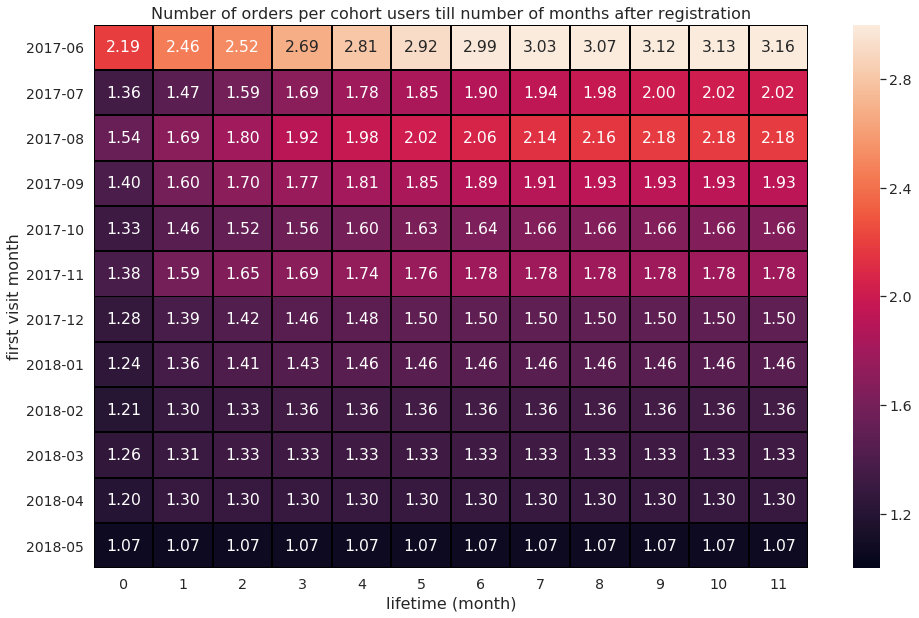

In [51]:
# Display heatmap 
sns.set(style='white')
sns.set(font_scale=1.3) 
plt.figure(figsize=(16, 10))
plt.title('Number of orders per cohort users till number of months after registration', fontsize=16)
ax = sns.heatmap(purchases_table, 
           annot=True, fmt='.2f', linewidths=1, linecolor='black', vmin=1, vmax=3) 
ax.set_xlabel('lifetime (month)', fontsize=16)
ax.tick_params(axis='y', rotation=0, labelsize=14)
ax.set_ylabel('first visit month', fontsize=16)

plt.show()


In terms of orders, we find that the june 2017 cohort placed in one year on average around 3 orders per cohort users. The July and August 2017 cohorts followed with ca. 2 orders on average. All the other cohorts placed less than 2 orders on averae. What could have possibly caused the more purchasing behavior of the June 2017 cohort? We can see that more than 2 orders on average were placed within the month of registration. So, perhaphs big sales were offered during the low summer season and although our product had less visitors, it generated many more sales in the summer. But, what about the generated revenue? We will look at this in the subsequent point. But first, we repeat the analysis for the source cohorts.

In [52]:
lifetime_res = 'M'
cohort_period = 'M'
cohorts_by = 'CA_source'
cast_str = 'datetime64[{}]'.format(cohort_period)
groupby_str = 'first_visit_{}'.format(cohort_period)


orders_['lifetime'] = count_lifetime(orders_['first_order_dt'], orders_['buy_ts'], 
                                     lifetime_res)

orders_counts = visits_orders_.copy()
orders_counts['first_visit_dt'] = (orders_counts['first_visit_dt']
                                          .astype(cast_str))
orders_counts = orders_counts.rename(
    {'first_visit_dt':groupby_str},  axis='columns')

orders_counts = groupby_agg(orders_counts, 
                                   [cohorts_by, 'lifetime'], 
                                   {'uid':'nunique', 'buy_ts':'count', 'revenue':'sum'})
#display(orders_counts.head())

initial_counts = visits_orders_.copy()


initial_counts = initial_counts.groupby(cohorts_by).agg({'uid':'nunique'})
initial_counts = initial_counts.rename(columns={'uid':'cohort_size'})
display(initial_counts.head())


orders_counts_by_source = orders_counts.merge(initial_counts, on=cohorts_by, how='left') 

orders_counts_by_source['purchases_{}'.format(lifetime_res)] = (
    orders_counts_by_source['buy_ts_count'] / orders_counts_by_source['cohort_size'])

display(orders_counts_by_source.head())


,cohort_size
CA_source,
1,5058
2,5181
3,9316
4,9324
5,5640


,CA_source,lifetime,uid_nunique,buy_ts_count,revenue_sum,cohort_size,purchases_M
0,1,0,4212,6267,33582.39,5058,1.239027
1,1,1,356,912,6779.77,5058,0.180308
2,1,2,127,232,1664.56,5058,0.045868
3,1,3,98,198,2536.53,5058,0.039146
4,1,4,91,131,632.09,5058,0.025900


We plot heatmaps of the total and average number of purchases for the source id cohorts.

In [53]:
purchases_pivot = orders_counts_by_source.pivot_table(
        index = cohorts_by,
        columns = 'lifetime',
        values = 'buy_ts_count'.format(lifetime_res),
        aggfunc= 'sum',
    )

purchases_pivot = purchases_pivot.fillna(0)
purchases_table = purchases_pivot.cumsum(axis=1)
purchases_table.columns =  purchases_table.columns.astype('int')


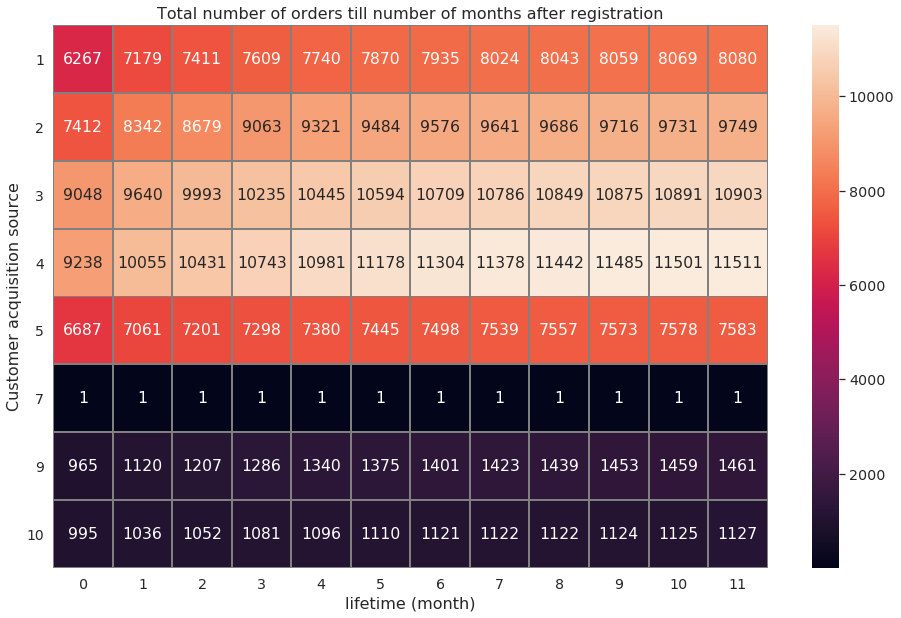

In [54]:
# Display heatmap 
sns.set(style='white')
sns.set(font_scale=1.3) 
plt.figure(figsize=(16, 10))
plt.title('Total number of orders till number of months after registration', fontsize=16)
ax = sns.heatmap(purchases_table, 
           annot=True, fmt='.0f', linewidths=1, linecolor='gray') 
ax.set_xlabel('lifetime (month)', fontsize=16)
ax.tick_params(axis='y', rotation=0, labelsize=14)
ax.set_ylabel('Customer acquisition source', fontsize=16)

plt.show()


In [55]:
purchases_pivot = orders_counts_by_source.pivot_table(
        index = cohorts_by,
        columns = 'lifetime',
        values = 'purchases_{}'.format(lifetime_res),
        aggfunc= 'sum',
    )

purchases_pivot = purchases_pivot.fillna(0)
purchases_table = purchases_pivot.cumsum(axis=1)
purchases_table.columns =  purchases_table.columns.astype('int')


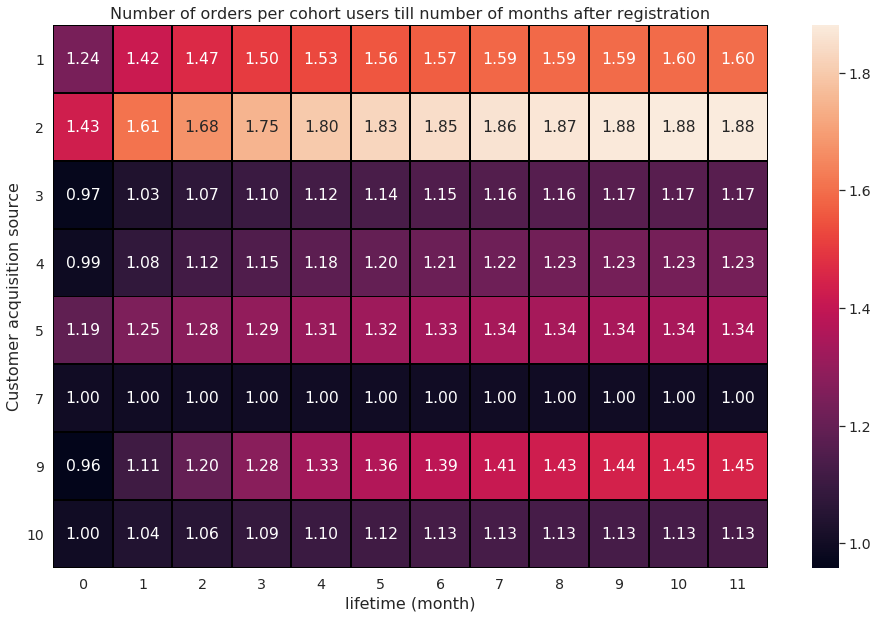

In [56]:
# Display heatmap 
sns.set(style='white')
sns.set(font_scale=1.3) 
plt.figure(figsize=(16, 10))
plt.title('Number of orders per cohort users till number of months after registration', fontsize=16)
ax = sns.heatmap(purchases_table, 
           annot=True, fmt='.2f', linewidths=1, linecolor='black') 
ax.set_xlabel('lifetime (month)', fontsize=16)
ax.tick_params(axis='y', rotation=0, labelsize=14)
ax.set_ylabel('Customer acquisition source', fontsize=16)

plt.show()


We found out sources 1, 2, and 9 outperformed the other sources, both in terms of the total number of placed orders and the average number of orders per cohort users. Source 1 led to about 1.6 orders per cohort users and source 2 to about 1.9 orders per cohort users. These are followed by source 9 having led close to 1.4 orders per cohort users. Let us next see if these source also led to more revenues. 

In [57]:
orders_counts.head()

,CA_source,lifetime,uid_nunique,buy_ts_count,revenue_sum
0,1,0,4212,6267,33582.39
1,1,1,356,912,6779.77
2,1,2,127,232,1664.56
3,1,3,98,198,2536.53
4,1,4,91,131,632.09


In [58]:
print('The average number of purchases per registered customers is:', 
      round(sum(orders_counts['buy_ts_count'])/(sum(orders_counts['uid_nunique'])), 2), 'orders')


The average number of purchases per registered customers is: 1.38 orders


The found average number of purchases refer to the total number of product purchases per registered users. Note that here we did not count the unique orders, since a given order might contain multiple products. Based on this average, we can conclude that only the June 2017 cohort performed quite above the average (with around 3 purchases per cohort users). All 2017 cohorts also performed better than the average, while all 2018 cohorts performed below the average. Interestingly, although the summer 2017 cohorts were part of the low season in terms of the number of visitors, they ended up being the cohorts with highest purchase per customer. In terms of sources, source 1, 2, and 9 cohorts performed above the average, with source 2 taking the lead over source 1 and both followed by source 9.

- *What is the average purchase size?*
- *How much money do they bring?*

We will complement the analysis in the previous step by finding this time the total revenue of the cohorts and the average revenue per cohort users.

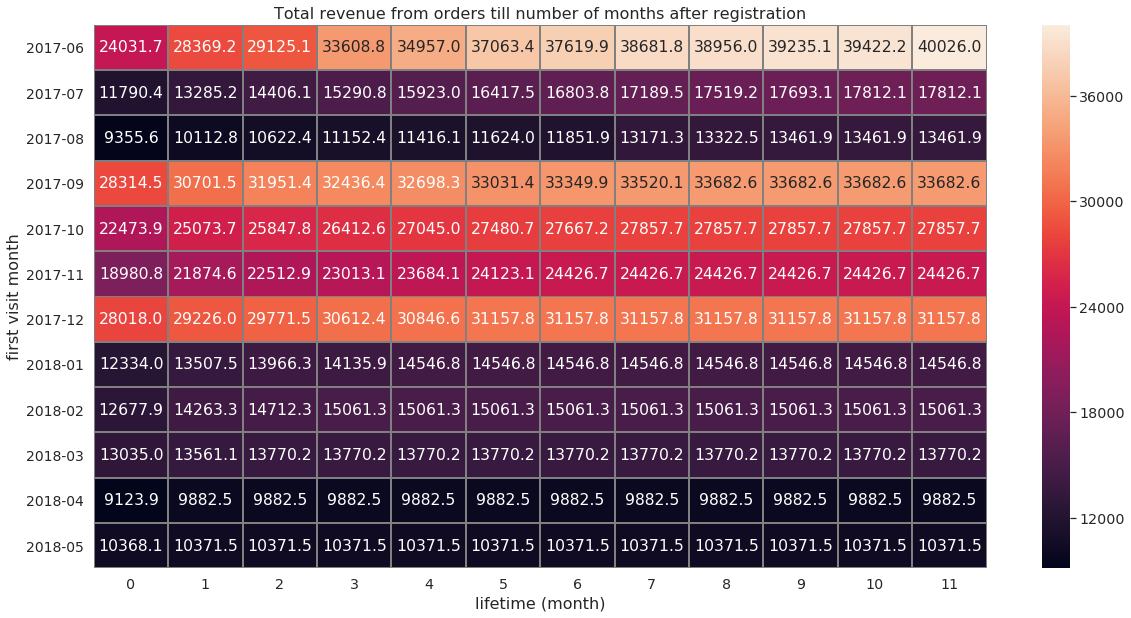

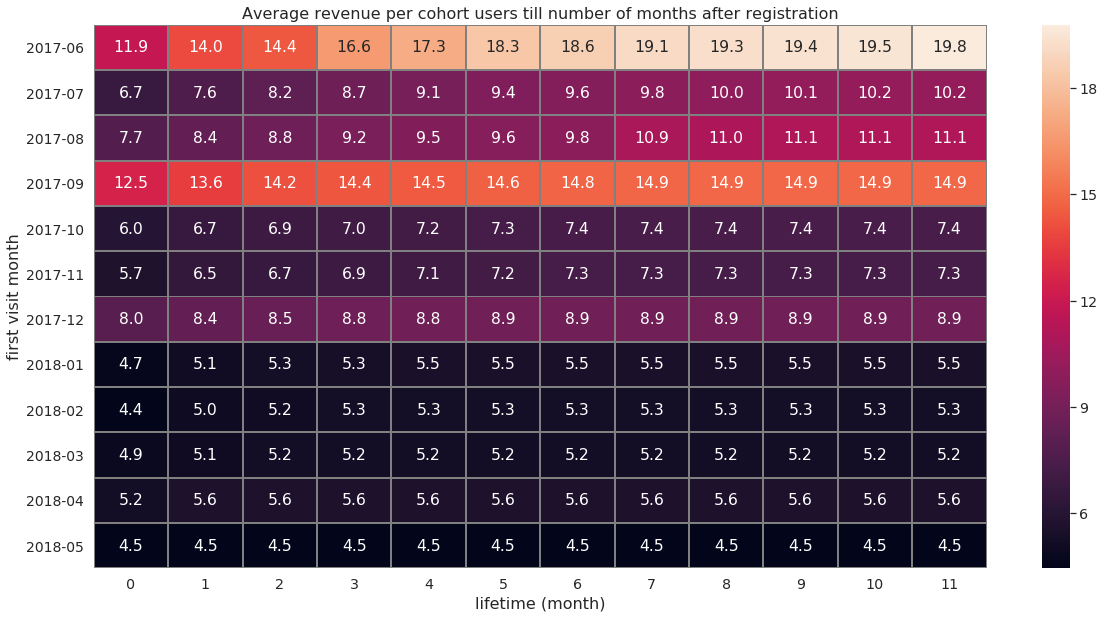

In [59]:
orders_counts_by_first['revenue_per_users_{}'.format(lifetime_res)] = (
    orders_counts_by_first['revenue_sum'] / orders_counts_by_first['cohort_size'])

cohorts_by = 'first_visit_{}'.format(cohort_period) # or source_id


revenue_pivot = orders_counts_by_first.pivot_table(
        index = cohorts_by,
        columns = 'lifetime',
        values = 'revenue_sum',
        aggfunc= 'sum',
    )

revenue_pivot = revenue_pivot.fillna(0)
revenue_table = revenue_pivot.cumsum(axis=1)
revenue_table.columns =  revenue_table.columns.astype('int')
revenue_table.index = revenue_table.index.strftime('%Y-%m')



# Display heatmap 
sns.set(style='white')
sns.set(font_scale=1.3) 
plt.figure(figsize=(20, 10))
plt.title('Total revenue from orders till number of months after registration', fontsize=16)
ax = sns.heatmap(revenue_table, 
           annot=True, fmt='.1f', linewidths=1, linecolor='gray') 
ax.set_xlabel('lifetime (month)', fontsize=16)
ax.tick_params(axis='y', rotation=0, labelsize=14)
ax.set_ylabel('first visit month', fontsize=16)



plt.show()


revenue_pivot = orders_counts_by_first.pivot_table(
        index = cohorts_by,
        columns = 'lifetime',
        values = 'revenue_per_users_{}'.format(lifetime_res),
        aggfunc= 'sum',
    )

revenue_pivot = revenue_pivot.fillna(0)
revenue_table_tt = revenue_pivot.cumsum(axis=1)
revenue_table_tt.columns =  revenue_table_tt.columns.astype('int')
revenue_table_tt.index = revenue_table_tt.index.strftime('%Y-%m')



# Display heatmap 

sns.set(style='white')
sns.set(font_scale=1.3) 
plt.figure(figsize=(20, 10))
plt.title('Average revenue per cohort users till number of months after registration', fontsize=16)
ax = sns.heatmap(revenue_table_tt, 
           annot=True, fmt='.1f', linewidths=1, linecolor='gray') 
ax.set_xlabel('lifetime (month)', fontsize=16)
ax.tick_params(axis='y', rotation=0, labelsize=14)
ax.set_ylabel('first visit month', fontsize=16)

plt.show()

The june 2017 cohort generated the biggest total and average revenues. It is followed by the september 2017 cohort.

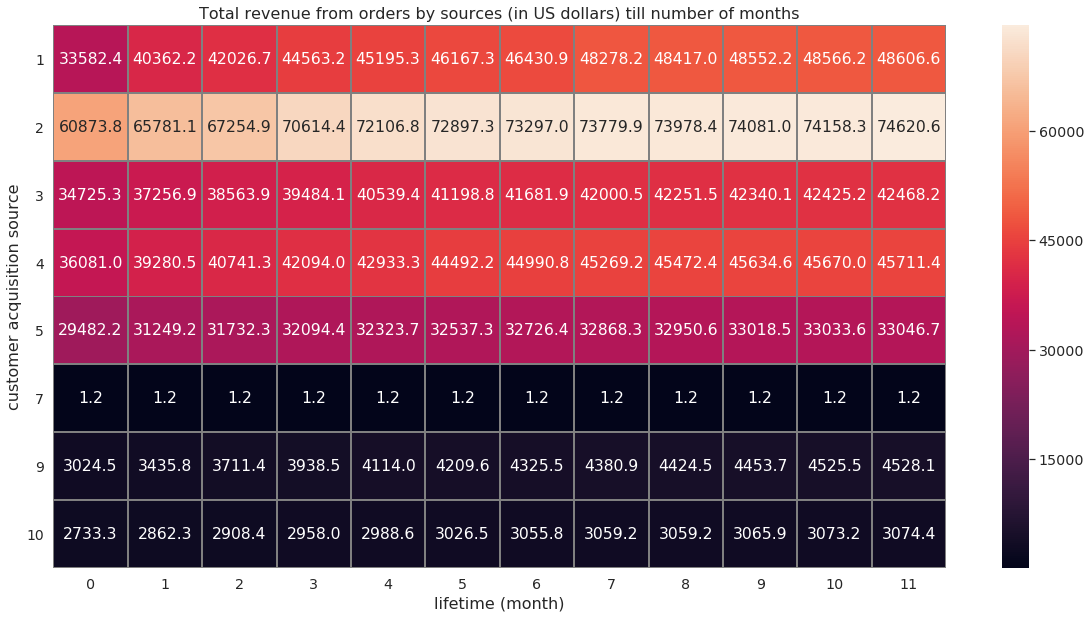

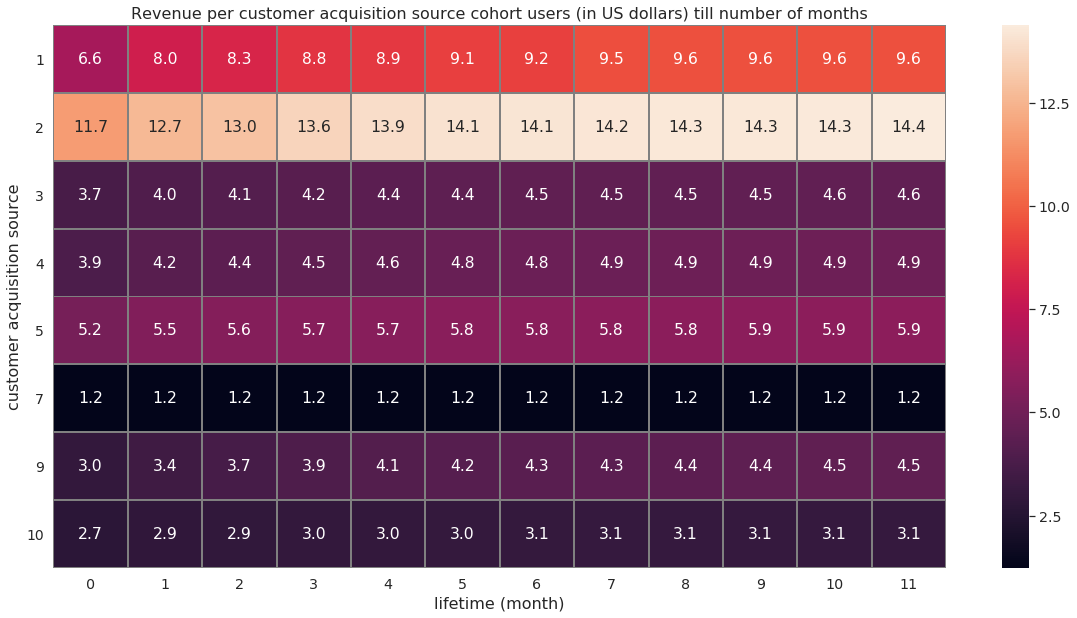

In [60]:
orders_counts_by_source['revenue_per_users_{}'.format(lifetime_res)] = (
    orders_counts_by_source['revenue_sum'] / orders_counts_by_source['cohort_size'])

cohorts_by = 'CA_source'

revenue_pivot = orders_counts_by_source.pivot_table(
        index = cohorts_by,
        columns = 'lifetime',
        values = 'revenue_sum',
        aggfunc= 'sum',
    )

revenue_pivot = revenue_pivot.fillna(0)
revenue_table = revenue_pivot.cumsum(axis=1)
revenue_table.columns =  revenue_table.columns.astype('int')


# Display heatmap 
sns.set(style='white')
sns.set(font_scale=1.3) 
plt.figure(figsize=(20, 10))
plt.title('Total revenue from orders by sources (in US dollars) till number of months', fontsize=16)
ax = sns.heatmap(revenue_table, 
           annot=True, fmt='.1f', linewidths=1, linecolor='gray') 
ax.set_xlabel('lifetime (month)', fontsize=16)
ax.tick_params(axis='y', rotation=0, labelsize=14)
ax.set_ylabel('customer acquisition source', fontsize=16)
plt.show()


revenue_pivot = orders_counts_by_source.pivot_table(
        index = cohorts_by,
        columns = 'lifetime',
        values = 'revenue_per_users_{}'.format(lifetime_res),
        aggfunc= 'sum',
    )

revenue_pivot = revenue_pivot.fillna(0)
revenue_table = revenue_pivot.cumsum(axis=1)
revenue_table.columns =  revenue_table.columns.astype('int')


# Display heatmap 
sns.set(style='white')
sns.set(font_scale=1.3) 
plt.figure(figsize=(20, 10))
plt.title('Revenue per customer acquisition source cohort users (in US dollars) till number of months', fontsize=16)
ax = sns.heatmap(revenue_table, 
           annot=True, fmt='.1f', linewidths=1, linecolor='gray') 
ax.set_xlabel('lifetime (month)', fontsize=16)
ax.tick_params(axis='y', rotation=0, labelsize=14)
ax.set_ylabel('customer acquisition source', fontsize=16)
plt.show()


It looks like in terms of generated total revenue, as well as revenue per cohort users, source 2 significantly outperformed the other sources. It was follwed by source 1. They generated about 14.4 and 9.6 US dollars per cohort users at the end of the one year period. Also, about three quarters of the revenues are generated within the first month after registration. Source 5 follows them with close to 6 US dollars per users.

Note that the average revenue per cohort users is related to the users lifetime value (LTV). The latter is usually computed by finding the gross profit. However, as we do not know the margin_rate for our product, we estimated LTV based only on the revenues. 

In [61]:
print('The average size of purchases per buying customer is: {:.1f} US dollars'.format( 
      round(sum(orders['revenue'])/(orders['uid'].nunique()), 2), 'orders'))
print('The average size of purchases per registered customer is: {:.1f} US dollars'.format( 
      round(orders['revenue'].sum()/visits['uid'].nunique(), 2), 'orders'))

The average size of purchases per buying customer is: 6.9 US dollars
The average size of purchases per registered customer is: 1.1 US dollars


We found out that each customer generated on average close to 7 US dollar over the period of one year. If we compare this with the heatmaps, we find that the June to September 2017 and the December 2017 cohorts surpassed the average in the first month after registration. All other cohorts remained below the average over the period of one year. The June and September cohorts ended up spending on average 18.8 and 13.3 US dollars, respectively. As for the customer acquisition source cohorts, users from sources 1 and 2 generated more than the average (also already in their first month). The other sources, however, generated less than the average over the entire one year period. 

In [62]:
print('LTV of first visit month cohorts by month ages:')
display(revenue_table_tt)

LTV of first visit month cohorts by month ages:


lifetime,0,1,2,3,4,5,6,7,8,9,10,11
2017-06,11.879234,14.023351,14.396970,16.613332,17.279773,18.321003,18.596080,19.121033,19.256565,19.394533,19.486990,19.785492
2017-07,6.725824,7.578568,8.217952,8.722647,9.083280,9.365351,9.585733,9.805773,9.993839,10.093035,10.160930,10.160930
2017-08,7.744677,8.371540,8.793419,9.232086,9.450430,9.622558,9.811217,10.903386,11.028560,11.143932,11.143932,11.143932
2017-09,12.545206,13.602796,14.156575,14.371480,14.487506,14.635104,14.776230,14.851604,14.923598,14.923598,14.923598,14.923598
2017-10,5.975512,6.666775,6.872595,7.022749,7.190907,7.306743,7.356355,7.406990,7.406990,7.406990,7.406990,7.406990
2017-11,5.654084,6.516130,6.706268,6.855252,7.055144,7.185922,7.276354,7.276354,7.276354,7.276354,7.276354,7.276354
2017-12,8.025783,8.371825,8.528087,8.768952,8.836030,8.925193,8.925193,8.925193,8.925193,8.925193,8.925193,8.925193
2018-01,4.664890,5.108748,5.282281,5.346399,5.501823,5.501823,5.501823,5.501823,5.501823,5.501823,5.501823,5.501823
2018-02,4.445270,5.001168,5.158580,5.280957,5.280957,5.280957,5.280957,5.280957,5.280957,5.280957,5.280957,5.280957
2018-03,4.894840,5.092418,5.170920,5.170920,5.170920,5.170920,5.170920,5.170920,5.170920,5.170920,5.170920,5.170920


<a class="anchor" id="step2_3"></a> 
#### Step 2.3. Marketing analysis:

So far we learned about our product and its sales performance. Now it is time to analyze marketing expenses and see whether the investments payed out.
3. Marketing:
    - How much money was spent? Overall/per source/over time
    - How much did customer acquisition from each of the sources cost?
    - How worthwhile where the investments? (ROI)
    

- *How much money was spent? Overall/per source/over time*

Total money spent on marketing expenses: 329131.62 US dollars

Total money spent on marketing expenses by source:


,costs_US_dollars
source_id,
9,5517.49
10,5822.49
1,20833.27
2,42806.04
5,51757.10
4,61073.60
3,141321.63


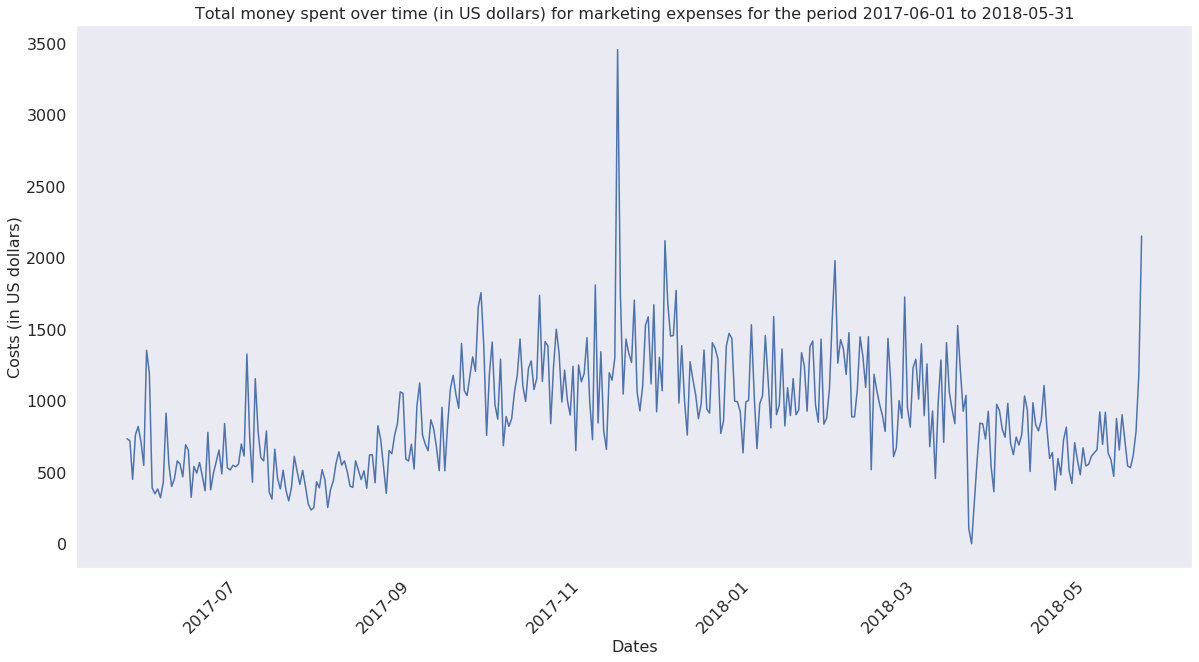

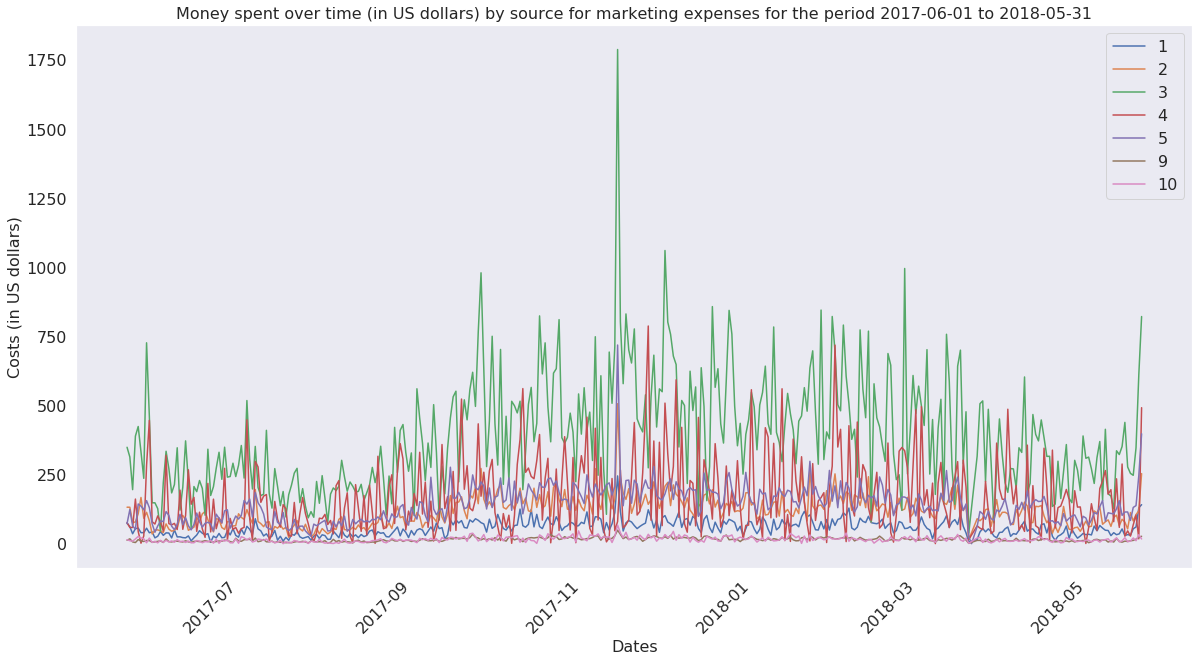

In [63]:
costs_total = costs['costs'].sum()
costs_by_source = costs.groupby('source_id').agg({'costs': 'sum'})
costs_by_source = costs_by_source.rename(columns={'costs':'costs_US_dollars'})
costs_by_dt = costs.groupby('dt').agg({'costs': 'sum'}).reset_index()
costs_by_source_dt = costs.groupby(['source_id', 'dt']).agg({'costs': 'sum'}).reset_index()

print('Total money spent on marketing expenses:', costs_total, 'US dollars')
print()
print('Total money spent on marketing expenses by source:',)

display(costs_by_source.sort_values(by='costs_US_dollars'))

plt.figure(figsize=(20,10))
plt.plot(costs_by_dt['dt'], costs_by_dt['costs'])
plt.title('Total money spent over time (in US dollars) for marketing expenses '
          'for the period 2017-06-01 to 2018-05-31', fontsize=16)
plt.xlabel('Dates', fontsize=16)
plt.ylabel('Costs (in US dollars)', fontsize=16)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.grid()
plt.show()
plt.show()

# fig, ax = plt.subplots(figsize=(10,4))
plt.figure(figsize=(20,10))
for key, grp in costs_by_source_dt.groupby('source_id'):
    plt.plot(grp['dt'], grp['costs'], label=key)



plt.title('Money spent over time (in US dollars) by source for marketing expenses '
          'for the period 2017-06-01 to 2018-05-31', fontsize=16)
plt.xlabel('Dates', fontsize=16)
plt.ylabel('Costs (in US dollars)', fontsize=16)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid()
plt.show()


We found that source 3 was the most expensive source with ca. 140 thousand US dollars spent overall, followed by sources 4 and 5 with ca. 60 and 70 thousands, respectively. On the other hand, for the most revenue generating source 1 close to 21 thoudand was spent. For the second most revenue generating source 2, the expense was close to 43 thousand. Thus, it seems that the marketing expenses are not optimally allocated in terms of the marketing cost-revenue trade off. In addition, we found that no costs were incurred for the sources 6, 7, and 8.

- *How much did customer acquisition from each of the sources cost?*

In the previous step we computed the total costs. Here we will compute the expenses per source id cohorts. The customer acquisition cost (CAC) will be computed according to the most frequent source of each users. In the section on sales we had identified them and referred to them as the customer acquisition sources. 

Here, we count the size of each customer acquisition source and compute CAC by source.

In [64]:
visits_orders_.head()

,buy_ts,revenue,uid,first_order_dt,first_visit_dt,CA_source,lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,1,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,2,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,2,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,3,0


In [65]:
initial_counts = visits_orders_.groupby(by = 'CA_source')['uid'].nunique().to_frame()
CAC_per_source_cohort = costs_by_source['costs_US_dollars']/ initial_counts['uid']
print('CAC by source')
display(CAC_per_source_cohort[~CAC_per_source_cohort.isnull()].round(2))


CAC by source


1      4.12
2      8.26
3     15.17
4      6.55
5      9.18
9      5.47
10     5.85
dtype: float64

The CAC was most expensive for source 3 with slightly more than 2 US dollars. It was followed by source 2 and source 1. Comparing CAC by source with the average revenue per source at the end of the one year period, we can see that CAC < LTV for all sources. However, this comparison is not be adequate as our LTV computations did not take into account margin rate, so we can only use the LTV table to compare cohorts' performances among themselves. Instead, we will proceed with computing the return on investment (ROI) for each of the sources:

The difference between the previous and below CAC calculations are as followed. In the above calculations, we identify the most frequent source (I called CA_source) from which a user comes from and sum all the costs for the identified sources. Then, we divided the aggregated costs by counting the unique number of users by CA_source. Below, I divided the same total costs by counting the unique number of users by source_id. But, I think there is a problem with the below calculation because the numerator and denominator are not consistent. 

In [66]:
visits_ = visits.copy()
visits_ = groupby_join_on(visits, ['uid'], {'start_ts':'min'}, ['first_visit_dt'])
visits_ = visits_.sort_values(by='start_ts')
#display(visits_.head())

visits_grp = visits_.groupby('uid')['source_id'].first()
visits_grp.name = 'first_source_id'
#display(visits_grp.head())
visits_orders_ = orders_.copy()
visits_orders_ = orders_.merge(visits_grp, on='uid', how='left')
visits_grp_2 = visits_.groupby('uid')['first_visit_dt'].first()
visits_orders_ = visits_orders_.merge(visits_grp_2, on='uid', how='left')
#display(visits_orders_.head())

lifetime_res = 'M'
visits_orders_['lifetime'] = count_lifetime(visits_orders_['first_visit_dt'],
                                visits_orders_['first_order_dt'], lifetime_res)
#display(visits_orders_.head())



initial_counts = visits_orders_.groupby(by = 'first_source_id')['uid'].nunique().to_frame()
CAC_per_source_cohort = costs_by_source['costs_US_dollars']/ initial_counts['uid']
print('CAC by source (US Dollars)')
display(CAC_per_source_cohort[~CAC_per_source_cohort.isnull()].round(2))





CAC by source (US Dollars)


1      7.19
2     12.21
3     13.49
4      5.93
5      7.47
9      5.07
10     4.38
dtype: float64

In [67]:
# Average CAC over all period and for all sources
CAC_av = (costs_by_source['costs_US_dollars'].sum()/orders['uid'].nunique()).round(2)
print('Average CAC over the whole period and for all sources is:', CAC_av, 'US dollars.')

Average CAC over the whole period and for all sources is: 9.01 US dollars.


- *How worthwhile where the investments?*

The last metric we compute in this project is the return on investment (ROI).

In [68]:
initial_counts

,uid
first_source_id,
1,2899
2,3506
3,10473
4,10296
5,6931
7,1
9,1088
10,1329


In [69]:
visits_orders_.head()

,buy_ts,revenue,uid,first_order_dt,lifetime,first_source_id,first_visit_dt
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,0,1,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,0,2,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,0,2,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,0,2,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,0,3,2017-06-01 07:31:00


In [70]:
revenue_by_source = visits_orders_.groupby('first_source_id').agg({'revenue': 'sum'})

revenue_by_source = revenue_by_source.merge(costs_by_source, left_index=True, right_index=True)


revenue_by_source = revenue_by_source.merge(initial_counts,  left_index=True, right_index=True)

revenue_by_source['average profit by source cohorts'] = ((revenue_by_source['revenue'] - revenue_by_source['costs_US_dollars'])
                          /revenue_by_source['uid'])
display(revenue_by_source[['average profit by source cohorts']])


,average profit by source cohorts
1,3.538213
2,1.174435
3,-8.288971
4,-0.425094
5,0.125079
9,0.222344
10,-1.032476


In [71]:
revenue_by_source = visits_orders_.groupby('first_source_id').agg({'revenue': 'sum'})

LTV_by_source_cohort = revenue_by_source['revenue']/initial_counts['uid']
printmd('LTV by source cohort', color='blue')
display(LTV_by_source_cohort)
printmd('CAC per source cohort', color='blue')

display(CAC_per_source_cohort)

ROI = LTV_by_source_cohort/CAC_per_source_cohort
printmd('ROI (%) per source cohort', color='blue')

display(ROI*100)

<span style='color:blue'>LTV by source cohort</span>

first_source_id
1     10.724577
2     13.383802
3      5.204931
4      5.506685
5      7.592558
7      1.220000
9      5.293566
10     3.348631
dtype: float64

<span style='color:blue'>CAC per source cohort</span>

1      7.186364
2     12.209367
3     13.493901
4      5.931779
5      7.467479
7           NaN
9      5.071222
10     4.381106
dtype: float64

<span style='color:blue'>ROI (%) per source cohort</span>

first_source_id
1     149.235094
2     109.619133
3      38.572468
4      92.833614
5     101.674978
7            NaN
9     104.384421
10     76.433450
dtype: float64

We found that source 1 have the greatest return on investment with ROI given by close to 150%. Apart from source 1, the sources who paid themselves are sources 2, 9, and 5 (from higher return to lower). All others sources costed more than the revenue they generated.

**Concluding remarks:** In this step, we produced reports and calculated metrics related to the product, sales, and marketing. We also ploted graphs to display how the metrics differ for various devices and ad sources and how they change in time. We will summarize our findings and make recommendations in the next step. 

Let us summarize our findings regarding the sources. Source 1 is the winner with the highest ROI given by 150% and highest average profit of 3.5 US dollars per customer. Although source 2 generated more revenues at the end of the year, it costed about twice more than source 1, which led to a lower ROI of 109% and close to 1.2 dollars of average profit per customer. Sources 9 and 5 managed to cover its costs, with ROIs slightly above 100%, and thus the average profit per cohort users remained very little. However, we still believe source 9 can be promising, as it had higher revenue per customer compared to the rest (leaving out sources 1 and 2) despite very little was spent for marketing. Thus boosting the latter expenses for source 9 might lead to higer ROI. As for source 5, we had identified earlier source 5 as the third ranked source for its first day retention rate and the average revenue per user generated at the end of the one year period. Therefore, changing the marketing strategy for visitors from source 5, might lead to higher ROI. 

Sources 6 and 7 did not appear at all in our computations of this section. This is because all their customers were assigned to other sources from which they came from more often. Source 7 performed very poorly both in terms of retention and convertion (but our dataset contained only 36 visitors from that source anyway). While source 6 had a 50% retention rate in the first month after registration, it did not generate more than 10 US dollars for its 6 customers. No marketing costs were incurred for these sources. We do not know what these sources represent. From the ROI table, we can also conclude that the marketing expenses for source 3 was not justified: it was the most expensive source, yet didn't even generate as much as the average revenue per customers we found earlier (6.9 US dollars). In fact, each cohort customers led to a loss of about 8.3 US dollars on average. A similar conclusion can be drawn for source 4, which was the second most expensive source, though the loss was less significant compared to source 3. Sources 10 also performed poorly in terms of ROI. 

<a class="anchor" id="step3"></a> 
### Step 3. Write a conclusion: advise marketing experts how much money to invest and where.

Here is a summary of our findings:
- Retention rates of our product are low. A lot of users seem to register and return on the same day. As for the sources, sources 1 and 2 were more successful in attracting users, even though retention rates dropped as well quickly after registration.
- Orders were made in general by about one tenth of cohort users, and in the best case by one fifth (for the June 2017 cohort). More than 30% of the users coming from sources 1, 2, and 9 were converted. 
- Among the first visit month cohorts, the June 2017 cohort distinguished itself as the most lucrative cohort both in terms of the total revenue generated and the average revenue per users. Depositors from the cohort placed around 3 orders per cohort users and spent on average close to 19 US dollars per cohort users at the end of the one year period. 
- About 75% of the total revenue of the first visit month cohorts is generated within one month after registration. 
- Sources 1 and 2 significantly outperformed the others in terms of total revenue and average revenue per cohort users, as well as return on investment. Source 5 follows them (with a big gap) for the first two metrics, but resulted in a negative return on investment value.
- The CAC is less than LTV for all source cohorts. However, when we look to the ROI, source 1 followed by source 2 are the big winners. 
- The marketing expenses were highest for source 3. Although source 3 costed in total about 7 times more than source 1, its roi was about 70 times less. Similarly the marketing expenses of sources 4 and 10 did not end up being justified.

**Recommendations for the marketing department of Yandex.Afisha:** Based on our findings, we recommend the marketing department to transfer the marketing budget for source 3 to sources 1 and 2, transfer the marketing budget of source 4 to source 5, and transfer the marketing budget of source 10 to source 9. Finally, we recommend to target the summer cohorts, especially those whose first visit month is on June to increase revenue.